KERDOUN WASSIM

---------------------

# CASE STUDY : FACTOR MODELING US TREASURY YIELDS (2001-2005/2009-2013)

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = (16,6)

In [2]:
# Importing Yields of different tenors from 2000 to 2013
data_folder = '../Data/'

df_3mo = pd.read_csv(data_folder + 'DGS3MO.csv')
df_6mo = pd.read_csv(data_folder + 'DGS6MO.csv')
df_1yr = pd.read_csv(data_folder + 'DGS1.csv')
df_2yr = pd.read_csv(data_folder + 'DGS2.csv')
df_3yr = pd.read_csv(data_folder + 'DGS3.csv')
df_5yr = pd.read_csv(data_folder + 'DGS5.csv')
df_7yr = pd.read_csv(data_folder + 'DGS7.csv')
df_10yr = pd.read_csv(data_folder + 'DGS10.csv')
df_20yr = pd.read_csv(data_folder + 'DGS20.csv')

dfs = [df_3mo, df_6mo, df_1yr, df_2yr, df_3yr, df_5yr, df_7yr, df_10yr, df_20yr]
tenors = ['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS20']

for df,tenor in zip(dfs,tenors):
    
    df['DATE'] = pd.to_datetime(df['DATE'])
    df[tenor] = pd.to_numeric(df[tenor],errors='coerce')
    
data = df_3mo.merge(df_6mo, on='DATE', how='outer')\
    .merge(df_1yr, on='DATE', how='outer')\
    .merge(df_2yr, on='DATE', how='outer')\
    .merge(df_3yr, on='DATE', how='outer')\
    .merge(df_5yr, on='DATE', how='outer')\
    .merge(df_7yr, on='DATE', how='outer')\
    .merge(df_10yr, on='DATE', how='outer')\
    .merge(df_20yr, on='DATE', how='outer')

data.index = data['DATE']
data.drop('DATE',axis=1,inplace=True)
data.dropna(inplace=True)

data

DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS7  DGS10  DGS20
DATE                                                                  
2000-01-03    5.48    5.81  6.09  6.38  6.42  6.50  6.65   6.58   6.94
2000-01-04    5.43    5.75  6.00  6.30  6.34  6.40  6.56   6.49   6.84
2000-01-05    5.44    5.74  6.05  6.38  6.43  6.51  6.68   6.62   6.95
2000-01-06    5.41    5.69  6.03  6.35  6.39  6.46  6.63   6.57   6.86
2000-01-07    5.38    5.66  6.00  6.31  6.35  6.42  6.58   6.52   6.82
...            ...     ...   ...   ...   ...   ...   ...    ...    ...
2013-05-24    0.04    0.07  0.12  0.26  0.41  0.90  1.39   2.01   2.80
2013-05-28    0.05    0.09  0.13  0.29  0.49  1.02  1.53   2.15   2.95
2013-05-29    0.05    0.08  0.14  0.30  0.49  1.02  1.51   2.13   2.91
2013-05-30    0.04    0.07  0.13  0.31  0.49  1.01  1.51   2.13   2.92
2013-05-31    0.04    0.07  0.14  0.30  0.52  1.05  1.55   2.16   2.95

[3356 rows x 9 columns]

### WE WILL WORK ON 2 TIMEFRAMES (2001-2005) AND (2009-2013)

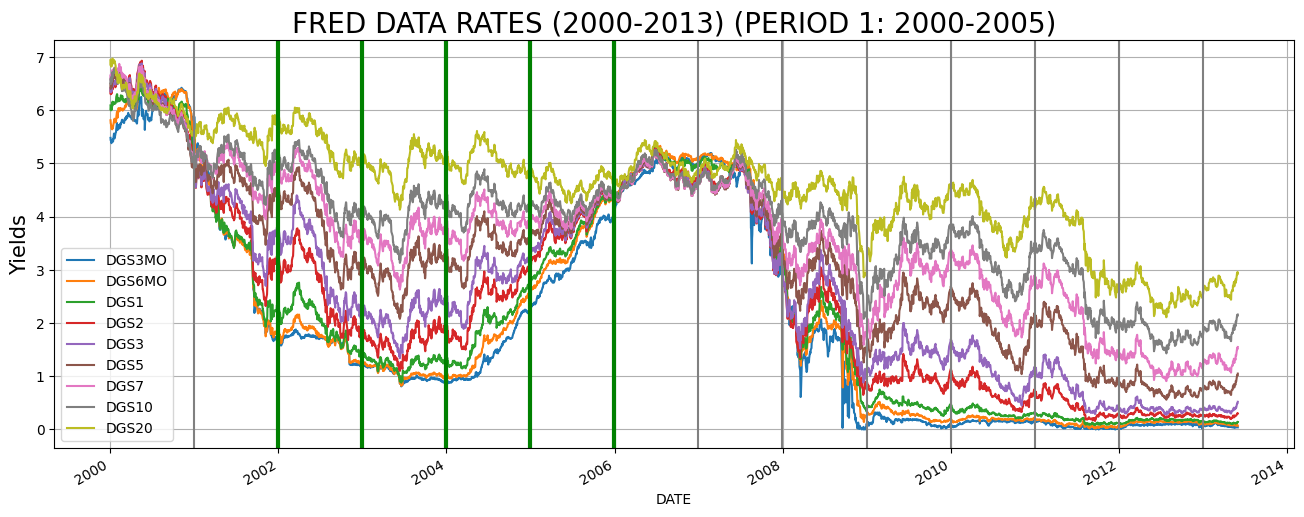

In [3]:
data.plot()

dates = ['2000-12-31','2001-12-31','2002-12-31','2003-12-31','2004-12-31','2005-12-31','2006-12-31','2007-12-31','2008-12-31','2009-12-31',
         '2010-12-31','2011-12-31','2012-12-31']

period_1 = ['2001-12-31','2002-12-31','2003-12-31','2004-12-31','2005-12-31']

for date in dates:
    plt.axvline(x=date,color='grey')

for date in period_1:
    plt.axvline(date,color='green',lw=3)
    
plt.title('FRED DATA RATES (2000-2013) (PERIOD 1: 2000-2005)',size=20)
plt.ylabel('Yields',size=15)
plt.grid(True)

Text(0, 0.5, 'Yields')

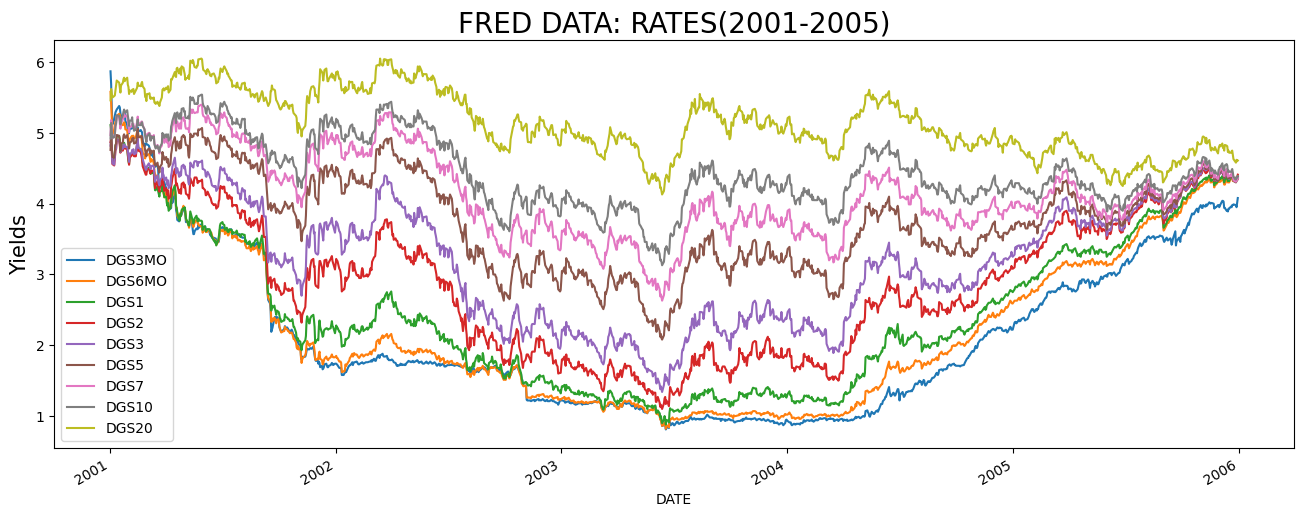

In [4]:
# US TREASURY YIELDS: 2001-2005

data1 = data.loc['2000-12-31':'2005-12-31',].dropna()

data1.plot()

plt.title('FRED DATA: RATES(2001-2005)',size=20)
plt.ylabel('Yields',size=15)

In [5]:
yield_changes = data1.diff().dropna()

daily_mean = yield_changes.mean()

daily_volatility = yield_changes.std()

print(f'Daily Mean : \n{daily_mean}')
print(f'Daily Volatility : \n{daily_volatility}')

Daily Mean : 
DGS3MO   -0.001435
DGS6MO   -0.000970
DGS1     -0.000585
DGS2     -0.000369
DGS3     -0.000361
DGS5     -0.000329
DGS7     -0.000489
DGS10    -0.000425
DGS20    -0.000682
dtype: float64
Daily Volatility : 
DGS3MO    0.038411
DGS6MO    0.038256
DGS1      0.048256
DGS2      0.065933
DGS3      0.069439
DGS5      0.068879
DGS7      0.066439
DGS10     0.062467
DGS20     0.055820
dtype: float64


- On Average all the Yields have declined from 2001 to 2005. 
- The Yield with the highest Volatility is the 3-year

<Axes: >

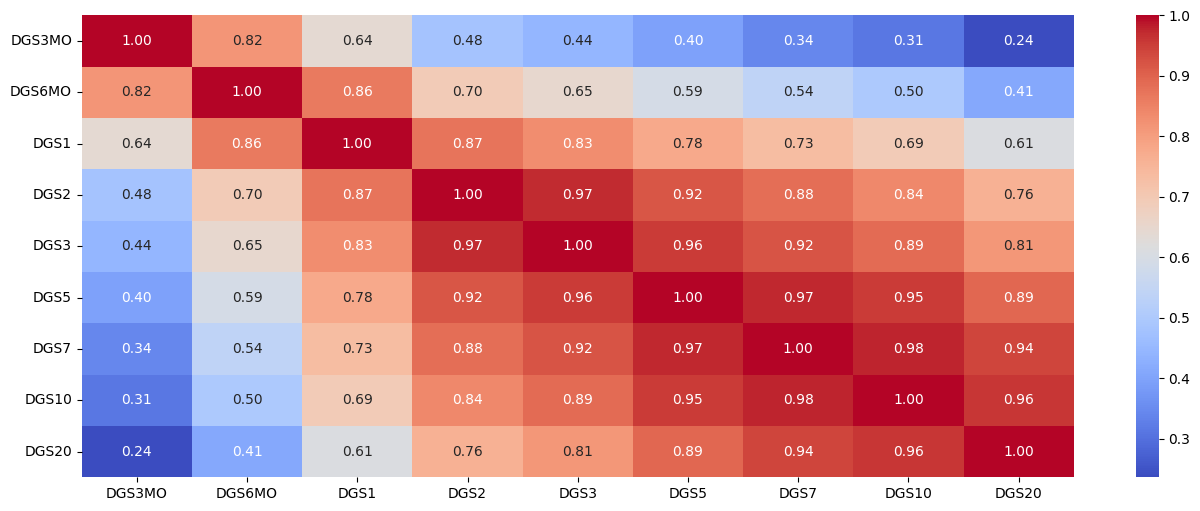

In [6]:
sns.heatmap(yield_changes.corr(),annot=True,
            cmap='coolwarm',fmt='.2f')

The Closer the Tenors of the Yields, the higher the correlations

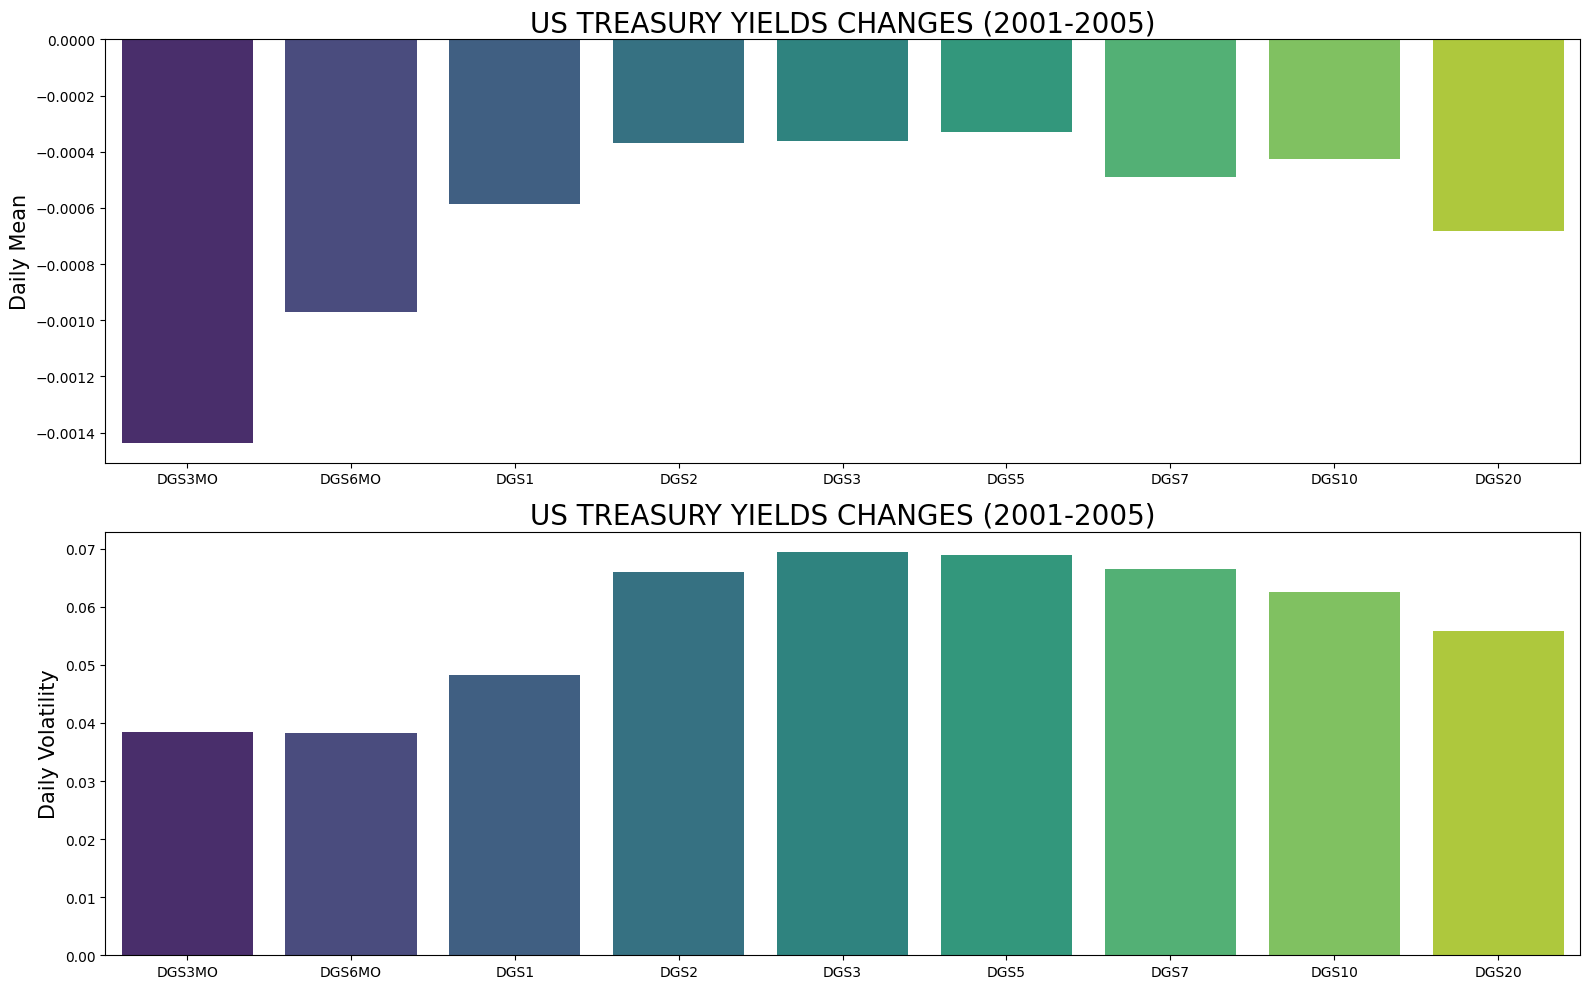

In [7]:
fig, axes = plt.subplots(2,1,figsize=(16,10))

axes = axes.flatten()

sns.barplot(daily_mean,palette='viridis',ax=axes[0])
axes[0].set_title('US TREASURY YIELDS CHANGES (2001-2005)',size=20)
axes[0].set_ylabel('Daily Mean',size=15)

sns.barplot(daily_volatility,palette='viridis',ax=axes[1])
axes[1].set_title('US TREASURY YIELDS CHANGES (2001-2005)',size=20)
axes[1].set_ylabel('Daily Volatility',size=15)

plt.tight_layout()

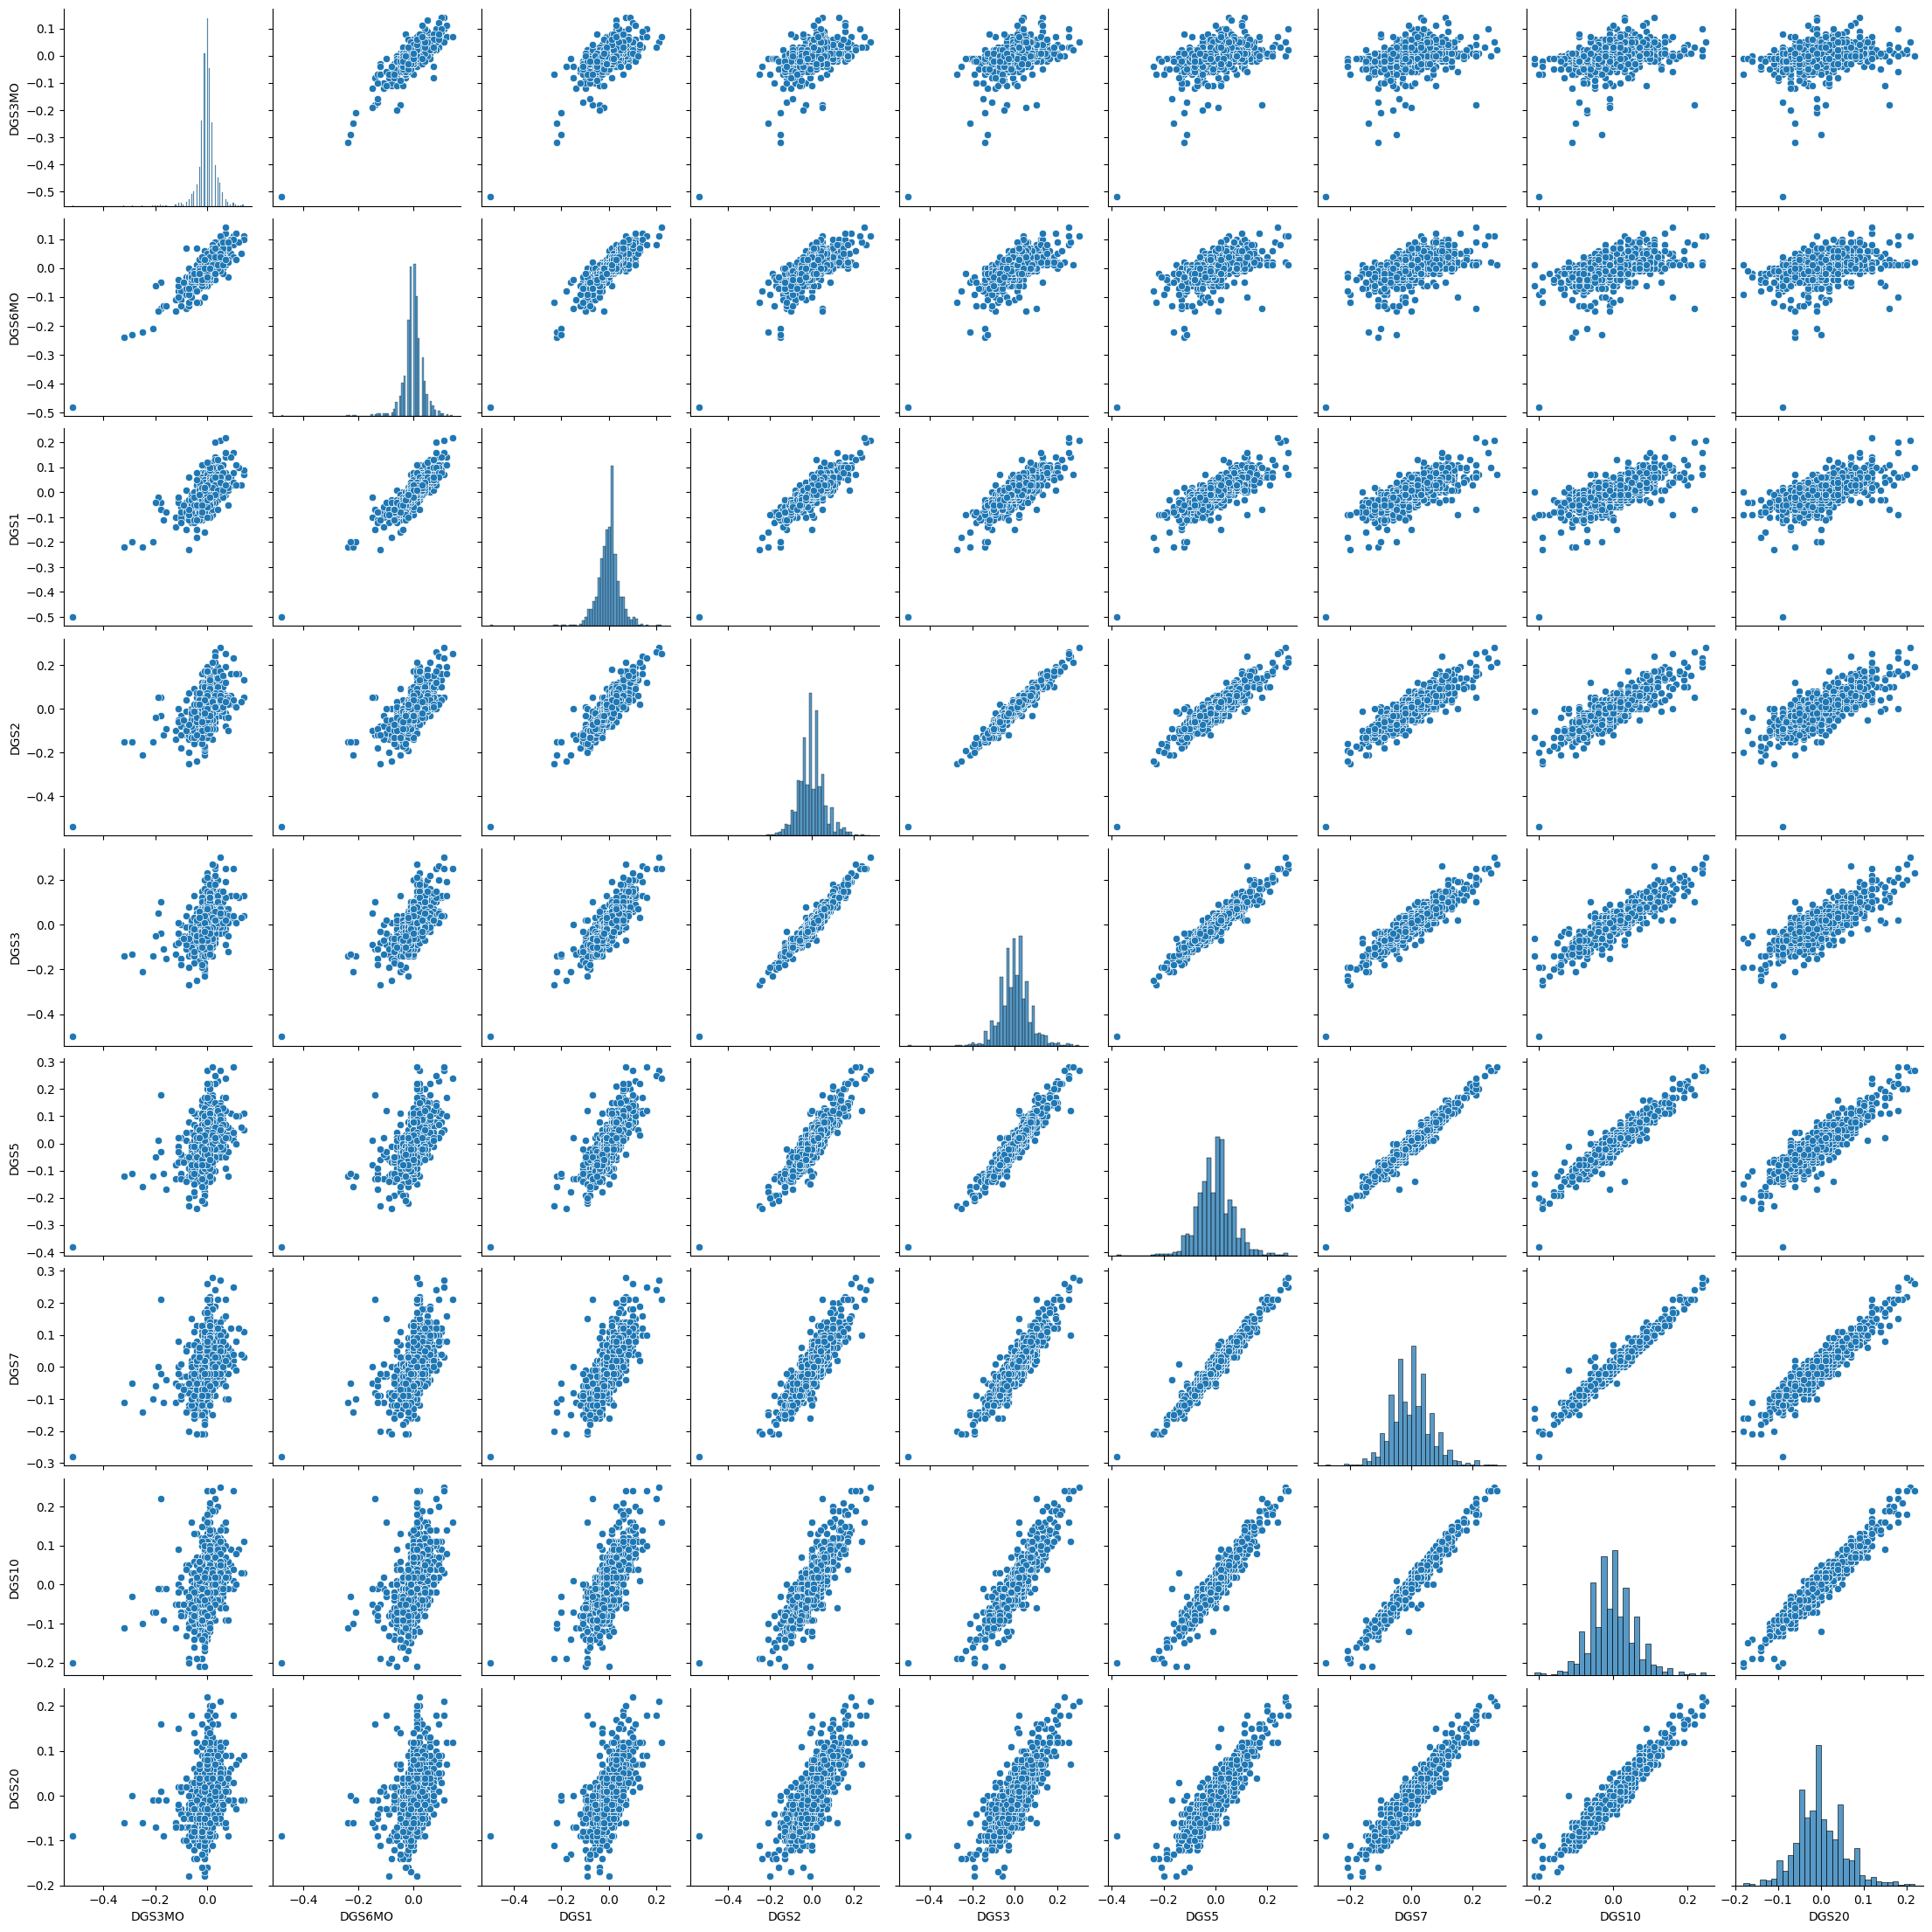

In [8]:
sns.pairplot(data=yield_changes)

### PERFORMING THE PRINCIPAL COMPONENT ANALYSIS

In [11]:
correlation_matrix = yield_changes.corr()

pca = PCA(random_state=42)

pca.fit(correlation_matrix)

explained_variance = pca.explained_variance_

explained_variance_ratio = pca.explained_variance_ratio_

components = pca.components_

cumulative_explained_ratio = np.cumsum(explained_variance_ratio)

print(f'Eigen Values :\n {explained_variance}')
print('-'*70)
print(f'Eigen Vectors :\n {components}')
print('-'*70)
print(f'Cumulative Explained Ratio :\n {cumulative_explained_ratio}')
print('-'*70)
print(f'Explained Variance Ratio:\n' + ', '.join(f"{x:.10f}" for x in explained_variance_ratio))

Eigen Values :
 [3.49704068e-01 4.44584627e-02 3.12995160e-03 9.46399986e-04
 5.20713636e-04 6.50787533e-05 4.46191294e-05 2.85854803e-05
 1.97342998e-33]
----------------------------------------------------------------------
Eigen Vectors :
 [[ 0.42079293  0.26355277  0.01905862 -0.21391749 -0.27222085 -0.34180441
  -0.388714   -0.40913688 -0.44488573]
 [-0.16028551 -0.48983357 -0.57424515 -0.45841559 -0.36326829 -0.18053689
  -0.06775378  0.01745967  0.15816588]
 [-0.41533569  0.48854308  0.38331288 -0.35563203 -0.39732825 -0.17193326
   0.01205985  0.12269098  0.3358418 ]
 [-0.38686065 -0.50773027  0.44277553  0.29299466  0.01668353 -0.36207941
  -0.31286684 -0.28490334  0.01474307]
 [ 0.50575372 -0.43332936  0.55201394 -0.28864463 -0.23666788  0.16755772
   0.17696809  0.2272997   0.03651834]
 [ 0.10269618  0.02561822 -0.09828664  0.46109143 -0.3386978  -0.52235315
   0.19943943  0.55167853 -0.18664762]
 [-0.02007483 -0.00506667  0.06429467 -0.40506937  0.60671172 -0.31595114
  -0.

- Note:
  - The first principal component variable explains 87.66% of the total variability
  - The second principal component variable explains 11.14% of the total variability
  - The first two principal component variables explain 98.81% of the total variability

Text(0, 0.5, 'Variances')

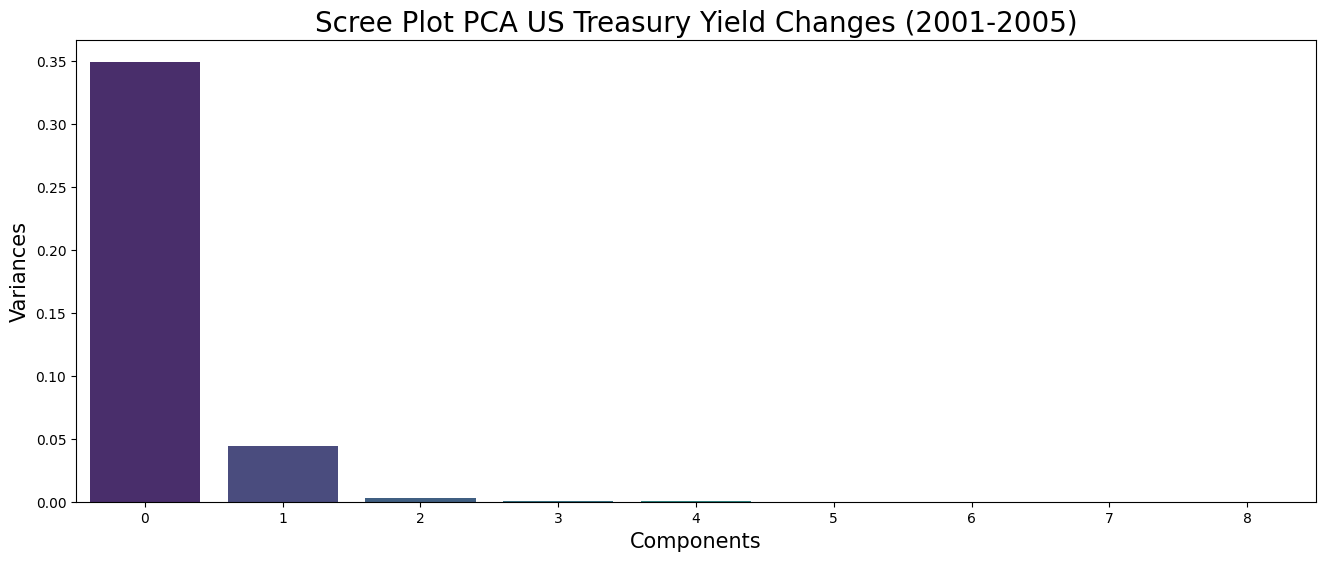

In [12]:
sns.barplot(explained_variance,palette='viridis')
plt.title('Scree Plot PCA US Treasury Yield Changes (2001-2005)',size=20)
plt.xlabel('Components',size=15)
plt.ylabel('Variances',size=15)

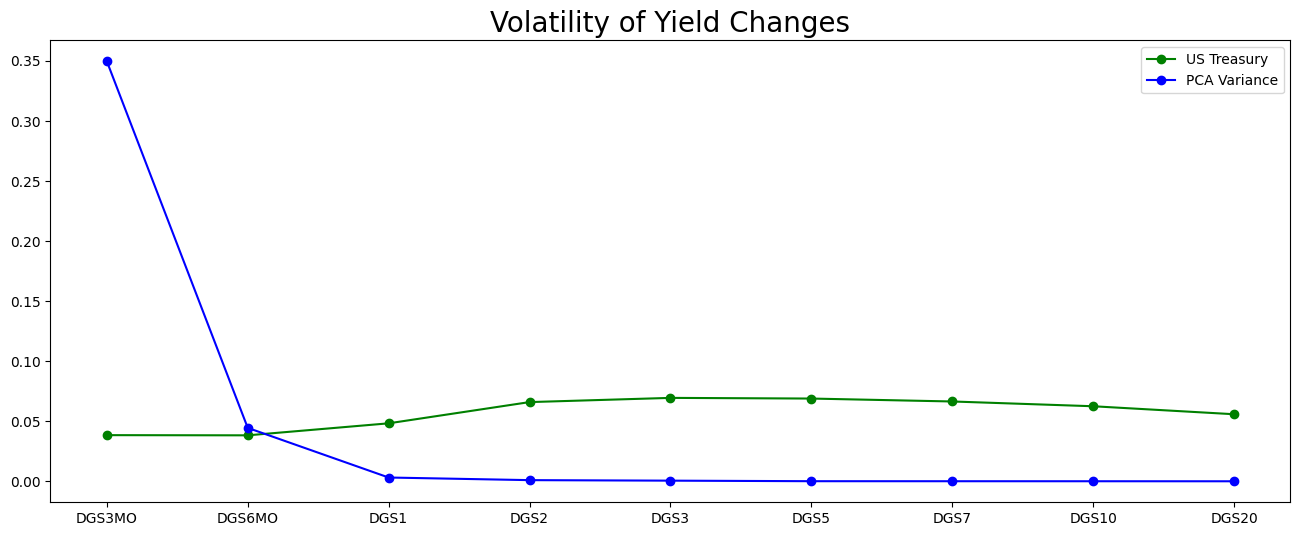

In [13]:
plt.plot(daily_volatility,color='green',marker='o',label='US Treasury')
plt.plot(explained_variance,color='blue',marker='o',label='PCA Variance')
plt.title('Volatility of Yield Changes',size=20)
plt.legend()

The principal components variables are translations and orthogonal rotations of the original variables. The first principal component variable has the highest variance and the last has the smallest.

In [14]:
eigen_vectors = pd.DataFrame(components,index=tenors,columns=[f'Comp. {i}'for i in range(1,10)])

eigen_vectors

Comp. 1   Comp. 2   Comp. 3   Comp. 4   Comp. 5   Comp. 6   Comp. 7  \
DGS3MO  0.420793  0.263553  0.019059 -0.213917 -0.272221 -0.341804 -0.388714   
DGS6MO -0.160286 -0.489834 -0.574245 -0.458416 -0.363268 -0.180537 -0.067754   
DGS1   -0.415336  0.488543  0.383313 -0.355632 -0.397328 -0.171933  0.012060   
DGS2   -0.386861 -0.507730  0.442776  0.292995  0.016684 -0.362079 -0.312867   
DGS3    0.505754 -0.433329  0.552014 -0.288645 -0.236668  0.167558  0.176968   
DGS5    0.102696  0.025618 -0.098287  0.461091 -0.338698 -0.522353  0.199439   
DGS7   -0.020075 -0.005067  0.064295 -0.405069  0.606712 -0.315951 -0.315362   
DGS10   0.052240 -0.008689  0.031414 -0.195811  0.291895 -0.481125  0.713621   
DGS20  -0.453444 -0.074879  0.086023 -0.182839 -0.108417  0.240164  0.257834   

         Comp. 8   Comp. 9  
DGS3MO -0.409137 -0.444886  
DGS6MO  0.017460  0.158166  
DGS1    0.122691  0.335842  
DGS2   -0.284903  0.014743  
DGS3    0.227300  0.036518  
DGS5    0.551679 -0.186648  
DGS7    0.496101 -0.133652  
DGS10  -0.361081  0.039350  
DGS20   0.059744 -0.780046

Text(0.5, 1.0, 'US Treasury Yield Changes: PCA (Loadings: PC1)')

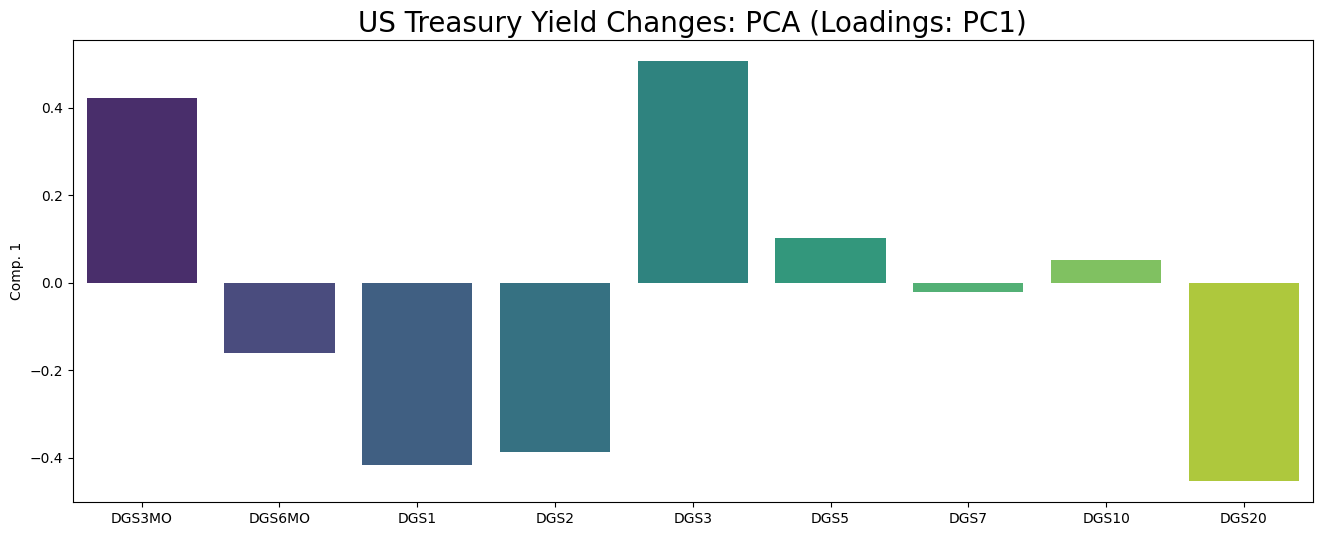

In [15]:
sns.barplot(eigen_vectors['Comp. 1'],palette='viridis')
plt.title('US Treasury Yield Changes: PCA (Loadings: PC1)',size=20)

Text(0.5, 1.0, 'Loadings: PC2')

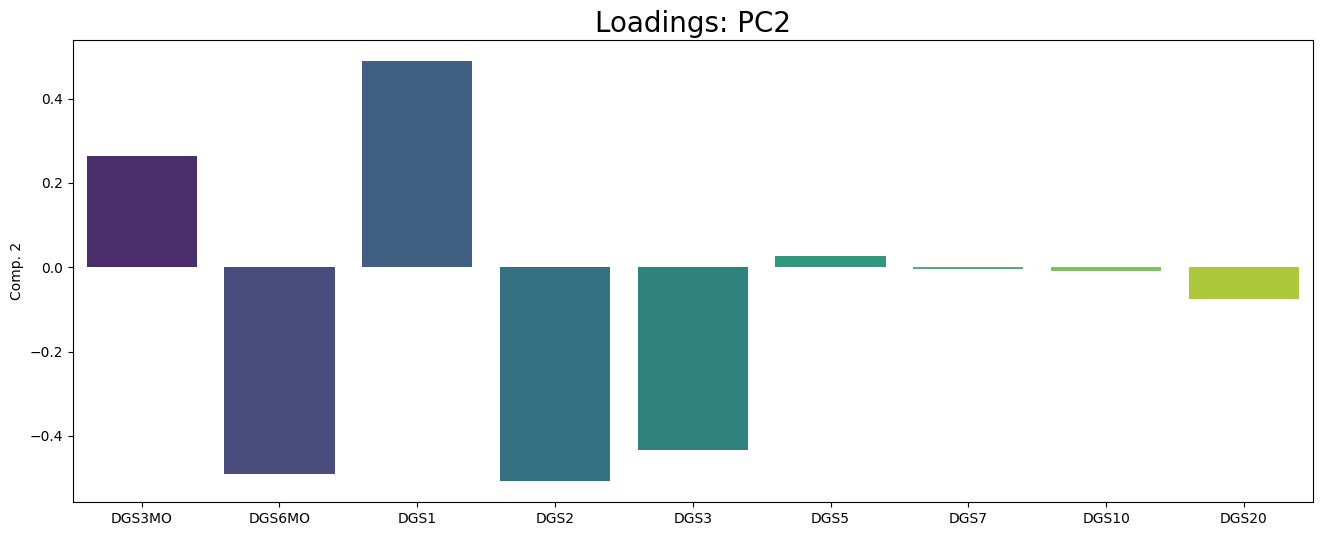

In [16]:
sns.barplot(eigen_vectors['Comp. 2'],palette='viridis')
plt.title('Loadings: PC2',size=20)

Text(0.5, 1.0, 'Loadings: PC3')

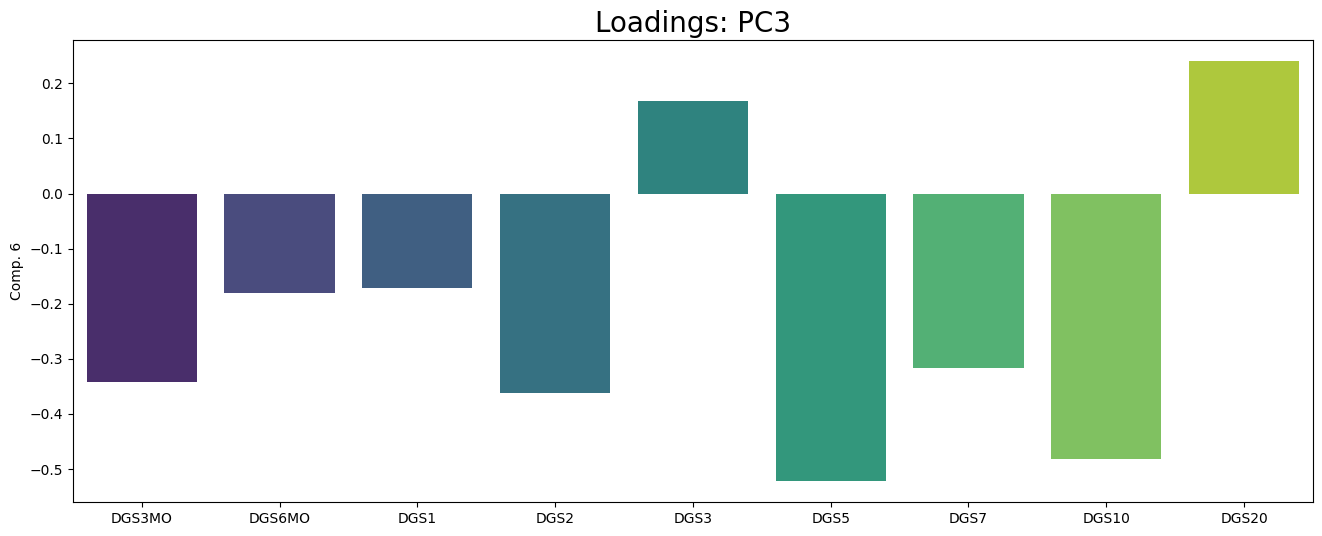

In [17]:
sns.barplot(eigen_vectors['Comp. 6'],palette='viridis')
plt.title('Loadings: PC3',size=20)

1. Comp. 1 (Level):
   - This component likely represents a parallel shift in the entire yield curve.
   - It has large, similarly signed loadings across most maturities.
   - Used to model overall changes in interest rate levels across all maturities.
   - Important for assessing duration risk in bond portfolios.

2. Comp. 2 (Slope):
   - Represents changes in the steepness of the yield curve.
   - Note the opposite signs between short-term (e.g., DGS3MO, DGS6MO) and long-term rates (e.g., DGS10, DGS20).
   - Used to model and trade on changes in the yield curve steepness.
   - Relevant for carry trades and assessing economic growth expectations.

3. Comp. 3 (Curvature):
   - Captures changes in the convexity or "belly" of the yield curve.
   - Observe how it has different signs for short, medium, and long-term rates.
   - Used in modeling more complex yield curve shapes and movements.
   - Important for butterfly trades and assessing monetary policy expectations.

In [18]:
scores = pd.DataFrame(pca.fit_transform(yield_changes),index=yield_changes.index,
                      columns=[f'Comp. {i}'for i in range(1,10)])

scores.head()

Comp. 1   Comp. 2   Comp. 3   Comp. 4   Comp. 5   Comp. 6  \
DATE                                                                     
2001-01-03 -0.294672  0.357777  0.043874  0.008955 -0.041587 -0.015542   
2001-01-04  0.398014  0.324935  0.159112 -0.022383 -0.010576  0.015464   
2001-01-05  0.465146  0.288852  0.059823 -0.023464 -0.002472  0.000905   
2001-01-08 -0.013047 -0.048768 -0.080996  0.004402  0.005694  0.010599   
2001-01-09 -0.193293 -0.103585  0.026550 -0.011438 -0.012723  0.001486   

             Comp. 7   Comp. 8   Comp. 9  
DATE                                      
2001-01-03  0.024981 -0.020537 -0.003821  
2001-01-04 -0.004471  0.017373  0.000355  
2001-01-05  0.003482  0.004704 -0.014830  
2001-01-08  0.003208 -0.000555  0.006357  
2001-01-09 -0.008433 -0.001858 -0.011809

In [19]:
scores.corr().round()

Comp. 1  Comp. 2  Comp. 3  Comp. 4  Comp. 5  Comp. 6  Comp. 7  \
Comp. 1      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
Comp. 2      0.0      1.0     -0.0     -0.0     -0.0     -0.0      0.0   
Comp. 3      0.0     -0.0      1.0      0.0     -0.0      0.0     -0.0   
Comp. 4      0.0     -0.0      0.0      1.0      0.0     -0.0     -0.0   
Comp. 5      0.0     -0.0     -0.0      0.0      1.0      0.0      0.0   
Comp. 6      0.0     -0.0      0.0     -0.0      0.0      1.0      0.0   
Comp. 7      0.0      0.0     -0.0     -0.0      0.0      0.0      1.0   
Comp. 8     -0.0      0.0     -0.0     -0.0      0.0      0.0      0.0   
Comp. 9      0.0     -0.0      0.0      0.0      0.0     -0.0     -0.0   

         Comp. 8  Comp. 9  
Comp. 1     -0.0      0.0  
Comp. 2      0.0     -0.0  
Comp. 3     -0.0      0.0  
Comp. 4     -0.0      0.0  
Comp. 5      0.0      0.0  
Comp. 6      0.0     -0.0  
Comp. 7      0.0     -0.0  
Comp. 8      1.0     -0.0  
Comp. 9     -0.0      1.0

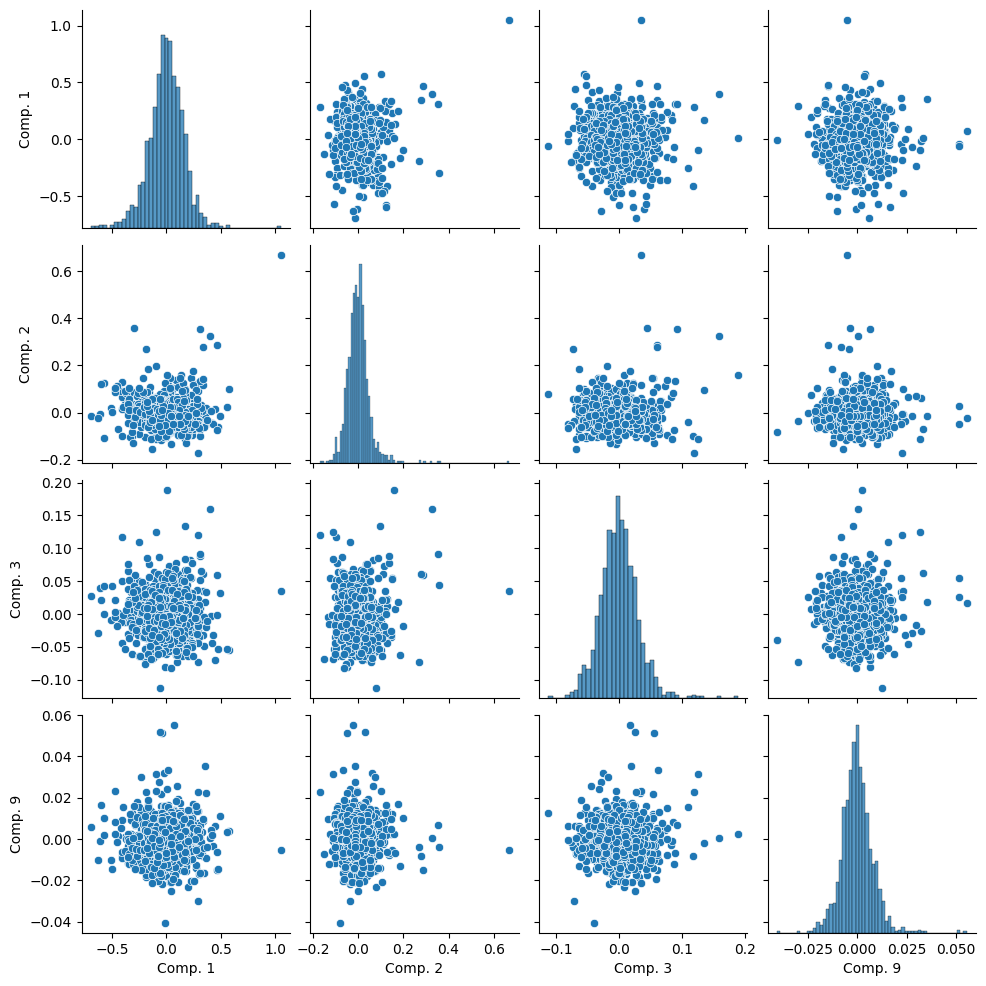

In [20]:
sns.pairplot(scores.iloc[:,[0,1,2,8]])

The PCA's component variables are uncorrelated. This is evident from the correlation matrix and the pairplot of the variables

Text(0, 0.5, 'Cumulative PC1')

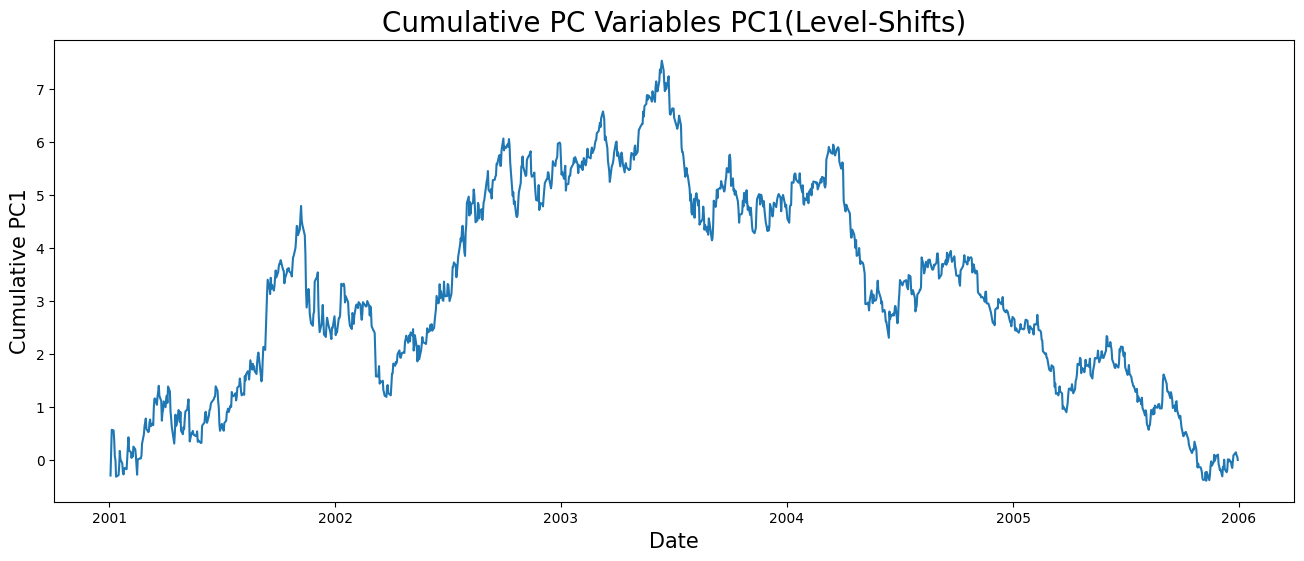

In [21]:
plt.plot(scores['Comp. 1'].cumsum())

plt.title('Cumulative PC Variables PC1(Level-Shifts)',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Cumulative PC1',size=15)

Text(0, 0.5, 'Cumulative PC2')

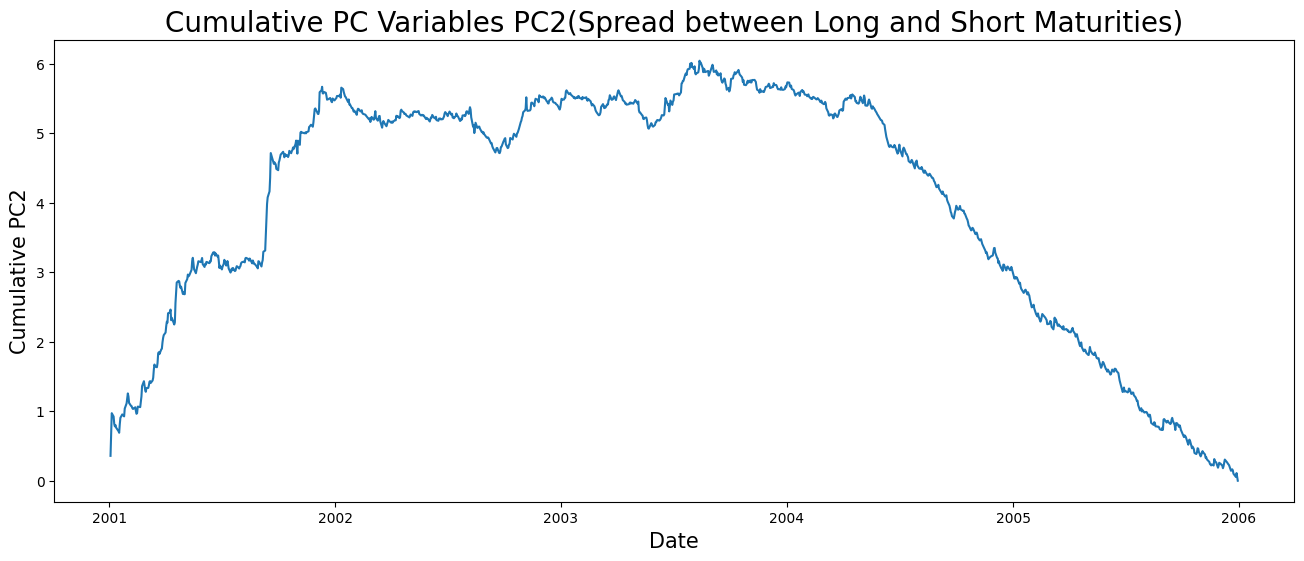

In [22]:
plt.plot(scores['Comp. 2'].cumsum())

plt.title('Cumulative PC Variables PC2(Spread between Long and Short Maturities)',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Cumulative PC2',size=15)

Text(0, 0.5, 'Cumulative PC3')

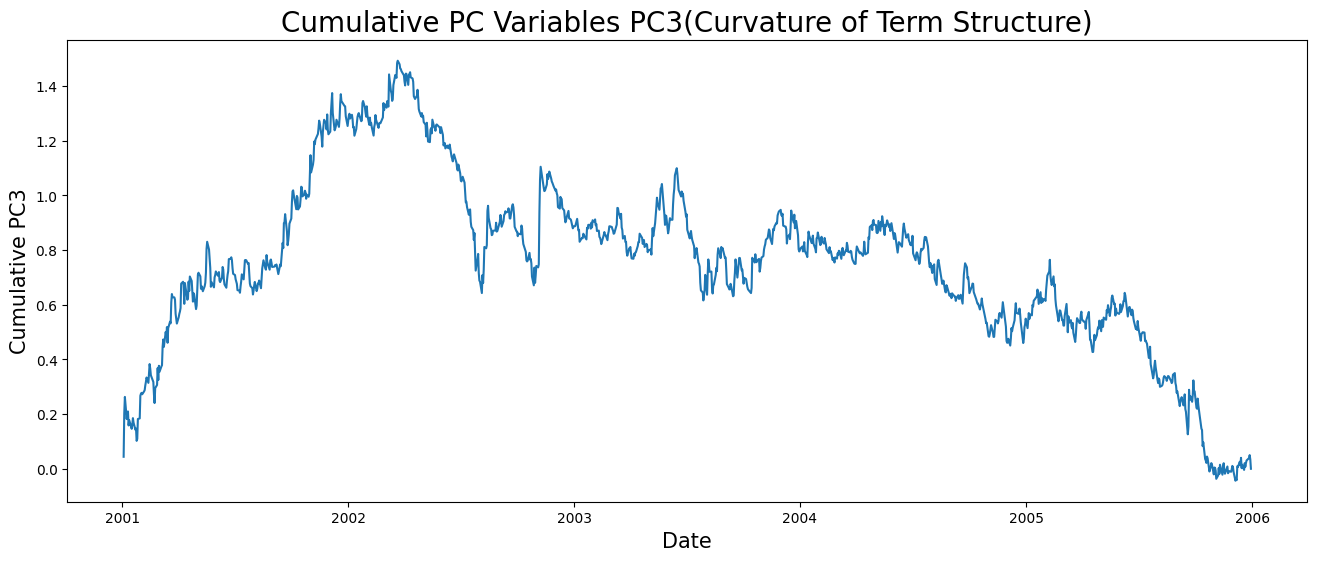

In [23]:
plt.plot(scores['Comp. 3'].cumsum())

plt.title('Cumulative PC Variables PC3(Curvature of Term Structure)',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Cumulative PC3',size=15)

### Factor Analysis

In [24]:
fa = FactorAnalyzer(n_factors=4,rotation=None)

fa.fit(yield_changes)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

In [25]:
uniquenesses = fa.get_uniquenesses()

print(f'Uniquenesses for Maturities: \n{tenors} \n{uniquenesses}')

Uniquenesses for Maturities: 
['DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20'] 
[0.27824843 0.02591157 0.05552253 0.0319327  0.00981547 0.02932134
 0.01548434 0.01223137 0.05556989]


In [26]:
loadings = fa.loadings_

print(f'Loadings (Factors vs Maturities) :\n{loadings}')

Loadings (Factors vs Maturities) :
[[ 0.52760167  0.63405271  0.17222751  0.10817991]
 [ 0.74096212  0.64276039  0.10805926 -0.01567939]
 [ 0.88083261  0.34327127 -0.12101121 -0.19008551]
 [ 0.95280818  0.02585945 -0.24334671  0.01837244]
 [ 0.96630923 -0.06639768 -0.20393889  0.10213366]
 [ 0.96551261 -0.18550268 -0.02004165  0.0604247 ]
 [ 0.95134339 -0.27250695  0.07108645  0.01216973]
 [ 0.92944867 -0.31949538  0.14688138 -0.01556791]
 [ 0.8624105  -0.39230029  0.20847403 -0.05759609]]


In [27]:
ss_loadings = fa.get_factor_variance()[0]

print(f'SS Loadings :\n{ss_loadings}')

SS Loadings :
[6.88974696 1.30272438 0.22728204 0.06620899]


In [28]:
prop_var = fa.get_factor_variance()[1]

print(f'Proportional Variance :\n{prop_var}')

Proportional Variance :
[0.76552744 0.14474715 0.02525356 0.00735655]


In [29]:
cumulative_var = fa.get_factor_variance()[2]

print(f'Cumulative Variance :\n{cumulative_var}')

Cumulative Variance :
[0.76552744 0.91027459 0.93552815 0.94288471]


In [30]:
fa.sufficiency(yield_changes.shape[1])

(0.1891028599124293, 6, 0.9998687410694916)

### 1. **Uniquenesses:**
   - **Interpretation**: Uniquenesses represent the portion of variance in each variable that is not explained by the common factors. Lower values indicate that a variable's variance is well-explained by the factors, while higher values indicate that a variable's variance is largely due to unique or idiosyncratic factors. For example:
     - **DGS6MO** has a very low uniqueness (0.0259), meaning most of its variance is explained by the common factors.
     - **DGS1** has a higher uniqueness (0.0555), indicating that a significant portion of its variance is not captured by the factors.

### 2. **Loadings:**
   - **Interpretation**: Loadings show the correlation between each variable and each factor. Higher absolute values suggest a stronger relationship between the variable and the factor.
     - For example, **DGS3MO** has a high loading on **Factor2** (0.815), indicating it is strongly associated with that factor.
     - **DGS10** has a high loading on **Factor1** (0.948), suggesting it is primarily influenced by this factor.

### 3. **SS Loadings (Sum of Squared Loadings):**
   - **Interpretation**: SS Loadings represent the total amount of variance explained by each factor. It’s calculated as the sum of squared loadings for each factor.
     - **Factor1** explains the most variance (4.758), indicating it is the most significant factor.
     - **Factor4** explains the least variance (0.039), suggesting it has a minimal impact.

### 4. **Proportional Variance:**
   - **Interpretation**: This shows the proportion of total variance in the data that is explained by each factor. It helps in understanding the relative importance of each factor.
     - **Factor1** accounts for **76.55%** of the variance, making it the most important factor.
     - **Factor4** explains only **0.74%** of the variance, indicating its limited role.

### 5. **Cumulative Variance:**
   - **Interpretation**: This shows the cumulative proportion of total variance explained by the factors up to a certain factor.
     - **Factor1** and **Factor2** together explain **91.03%** of the variance, which suggests that these two factors are sufficient to capture most of the variance in the data.

### 6. **Sufficiency Test (Chi-Square Statistic and P-Value):**
   - **Chi-Square Statistic**: Measures the fit of the factor model to the data. A lower value indicates a better fit.
   - **P-Value**: Tests the null hypothesis that the number of factors is sufficient. A high p-value (close to 1) suggests that the model with the specified number of factors adequately explains the data.
     - In your case, the very high p-value (0.9999) and the very low chi-square statistic suggest that the model with the chosen number of factors is sufficient to explain the correlations in the dataset.

### 2ND PERIOD

Text(0, 0.5, 'Yields')

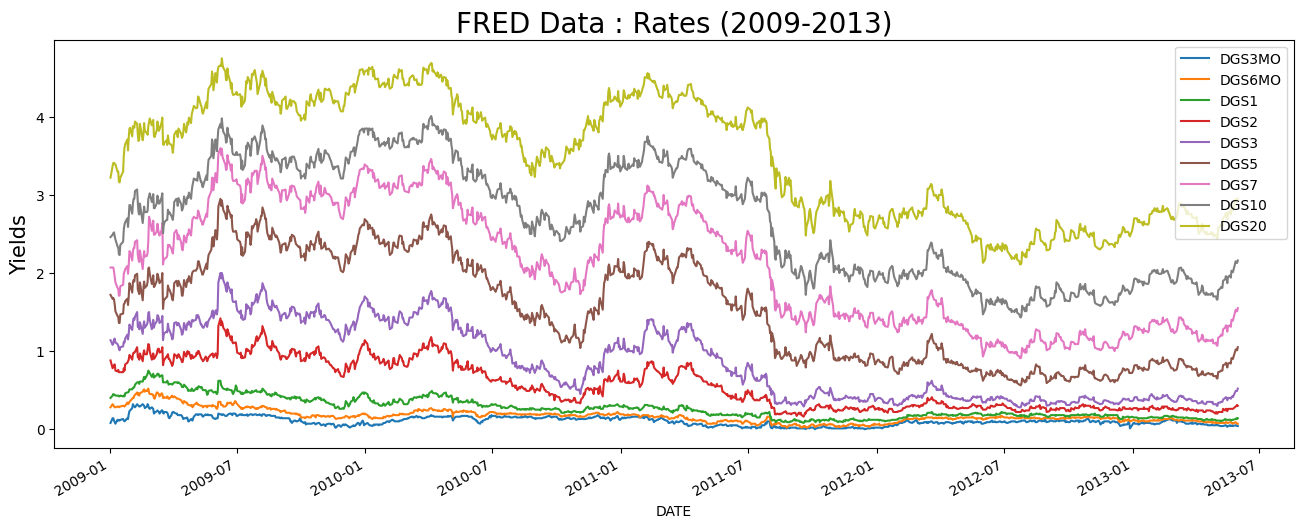

In [34]:
data2 = data.loc['2009-01-01':'2013-12-31',:]

data2.plot()
plt.title('FRED Data : Rates (2009-2013)',size=20)
plt.ylabel('Yields',size=15)

In [37]:
yield_changes2 = data2.diff().dropna()

daily_mean2 = yield_changes2.mean()

daily_volatility2 = yield_changes2.std()

print(f'Daily Mean :\n{daily_mean2}')

print(f'Daily Volatility :\n{daily_volatility2}')

Daily Mean :
DGS3MO   -0.000036
DGS6MO   -0.000190
DGS1     -0.000236
DGS2     -0.000525
DGS3     -0.000562
DGS5     -0.000607
DGS7     -0.000471
DGS10    -0.000272
DGS20    -0.000245
dtype: float64
Daily Volatility :
DGS3MO    0.012473
DGS6MO    0.011555
DGS1      0.015357
DGS2      0.035053
DGS3      0.044616
DGS5      0.059526
DGS7      0.065647
DGS10     0.064973
DGS20     0.065671
dtype: float64


- On average all the yields from 2009-2013 have declined.
- The yields with the highest volatility are the 7,10 and 20 years

<Axes: >

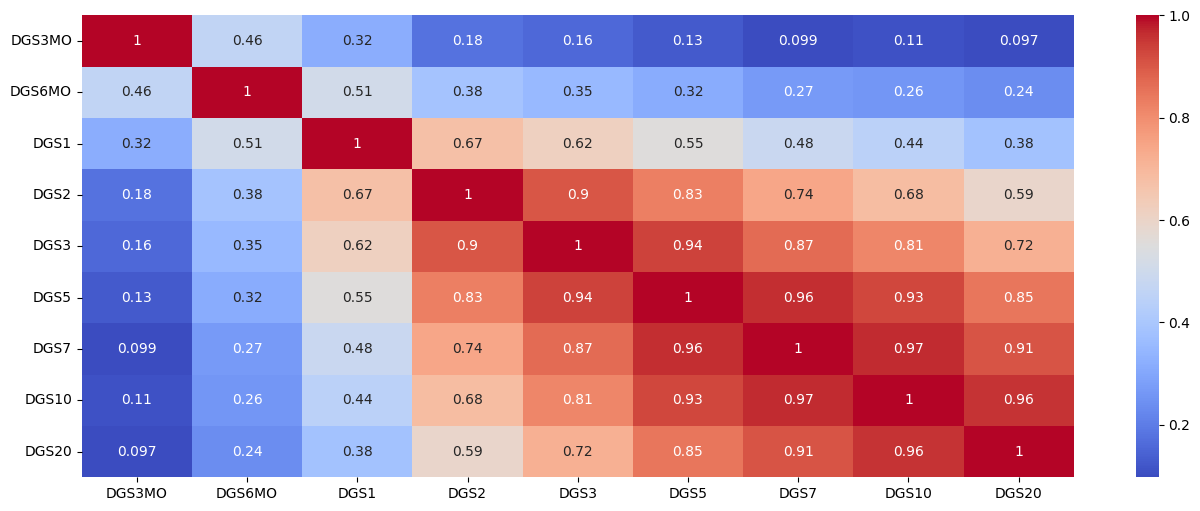

In [39]:
sns.heatmap(yield_changes2.corr(),annot=True,
            cmap='coolwarm')

 The closer the tenors of the yields, the higher the correlations.

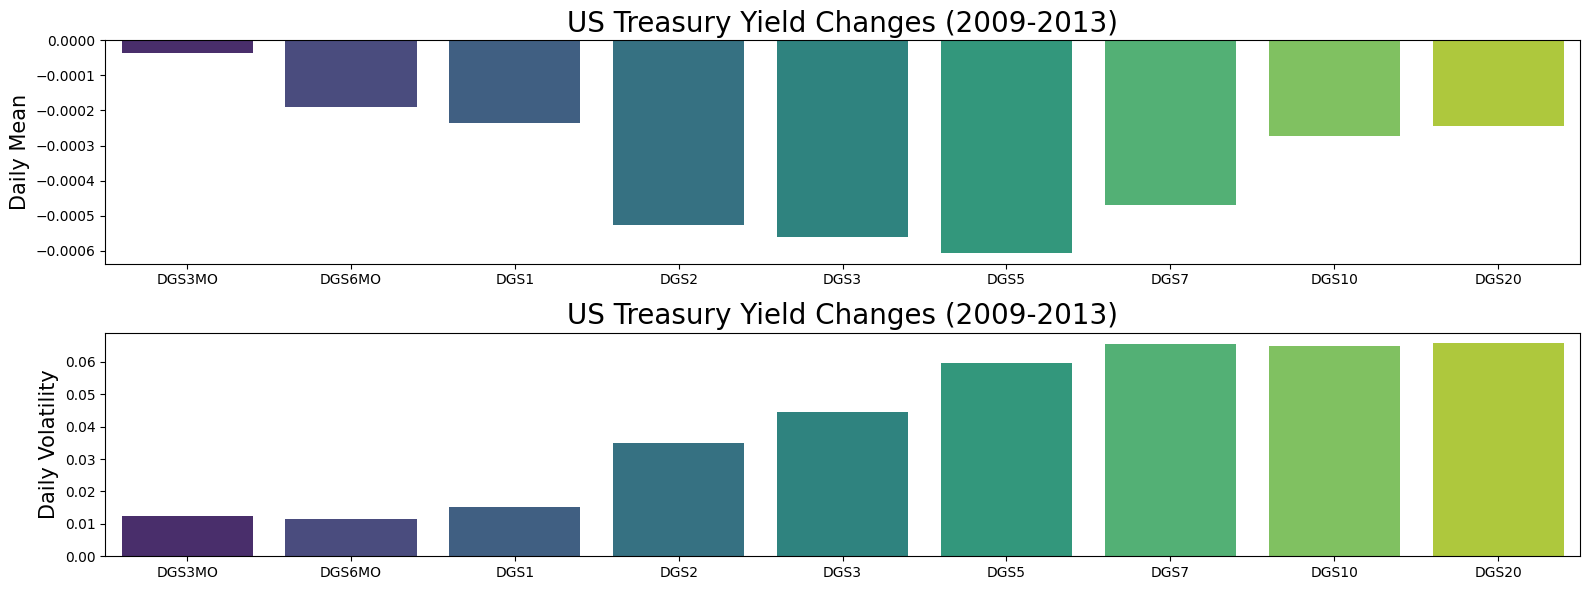

In [45]:
fig, axes = plt.subplots(2,1)

axes = axes.flatten()

sns.barplot(daily_mean2,ax=axes[0],palette='viridis')
axes[0].set_title('US Treasury Yield Changes (2009-2013)',size=20)
axes[0].set_ylabel('Daily Mean',size=15)

sns.barplot(daily_volatility2,ax=axes[1],palette='viridis')
axes[1].set_title('US Treasury Yield Changes (2009-2013)',size=20)
axes[1].set_ylabel('Daily Volatility',size=15)

plt.tight_layout()

- The yields on average fell during the period from 2009-2013.
- The volatilty of the yield changes is highest for tenors greater than 5 years (7, 10, and 20 years).

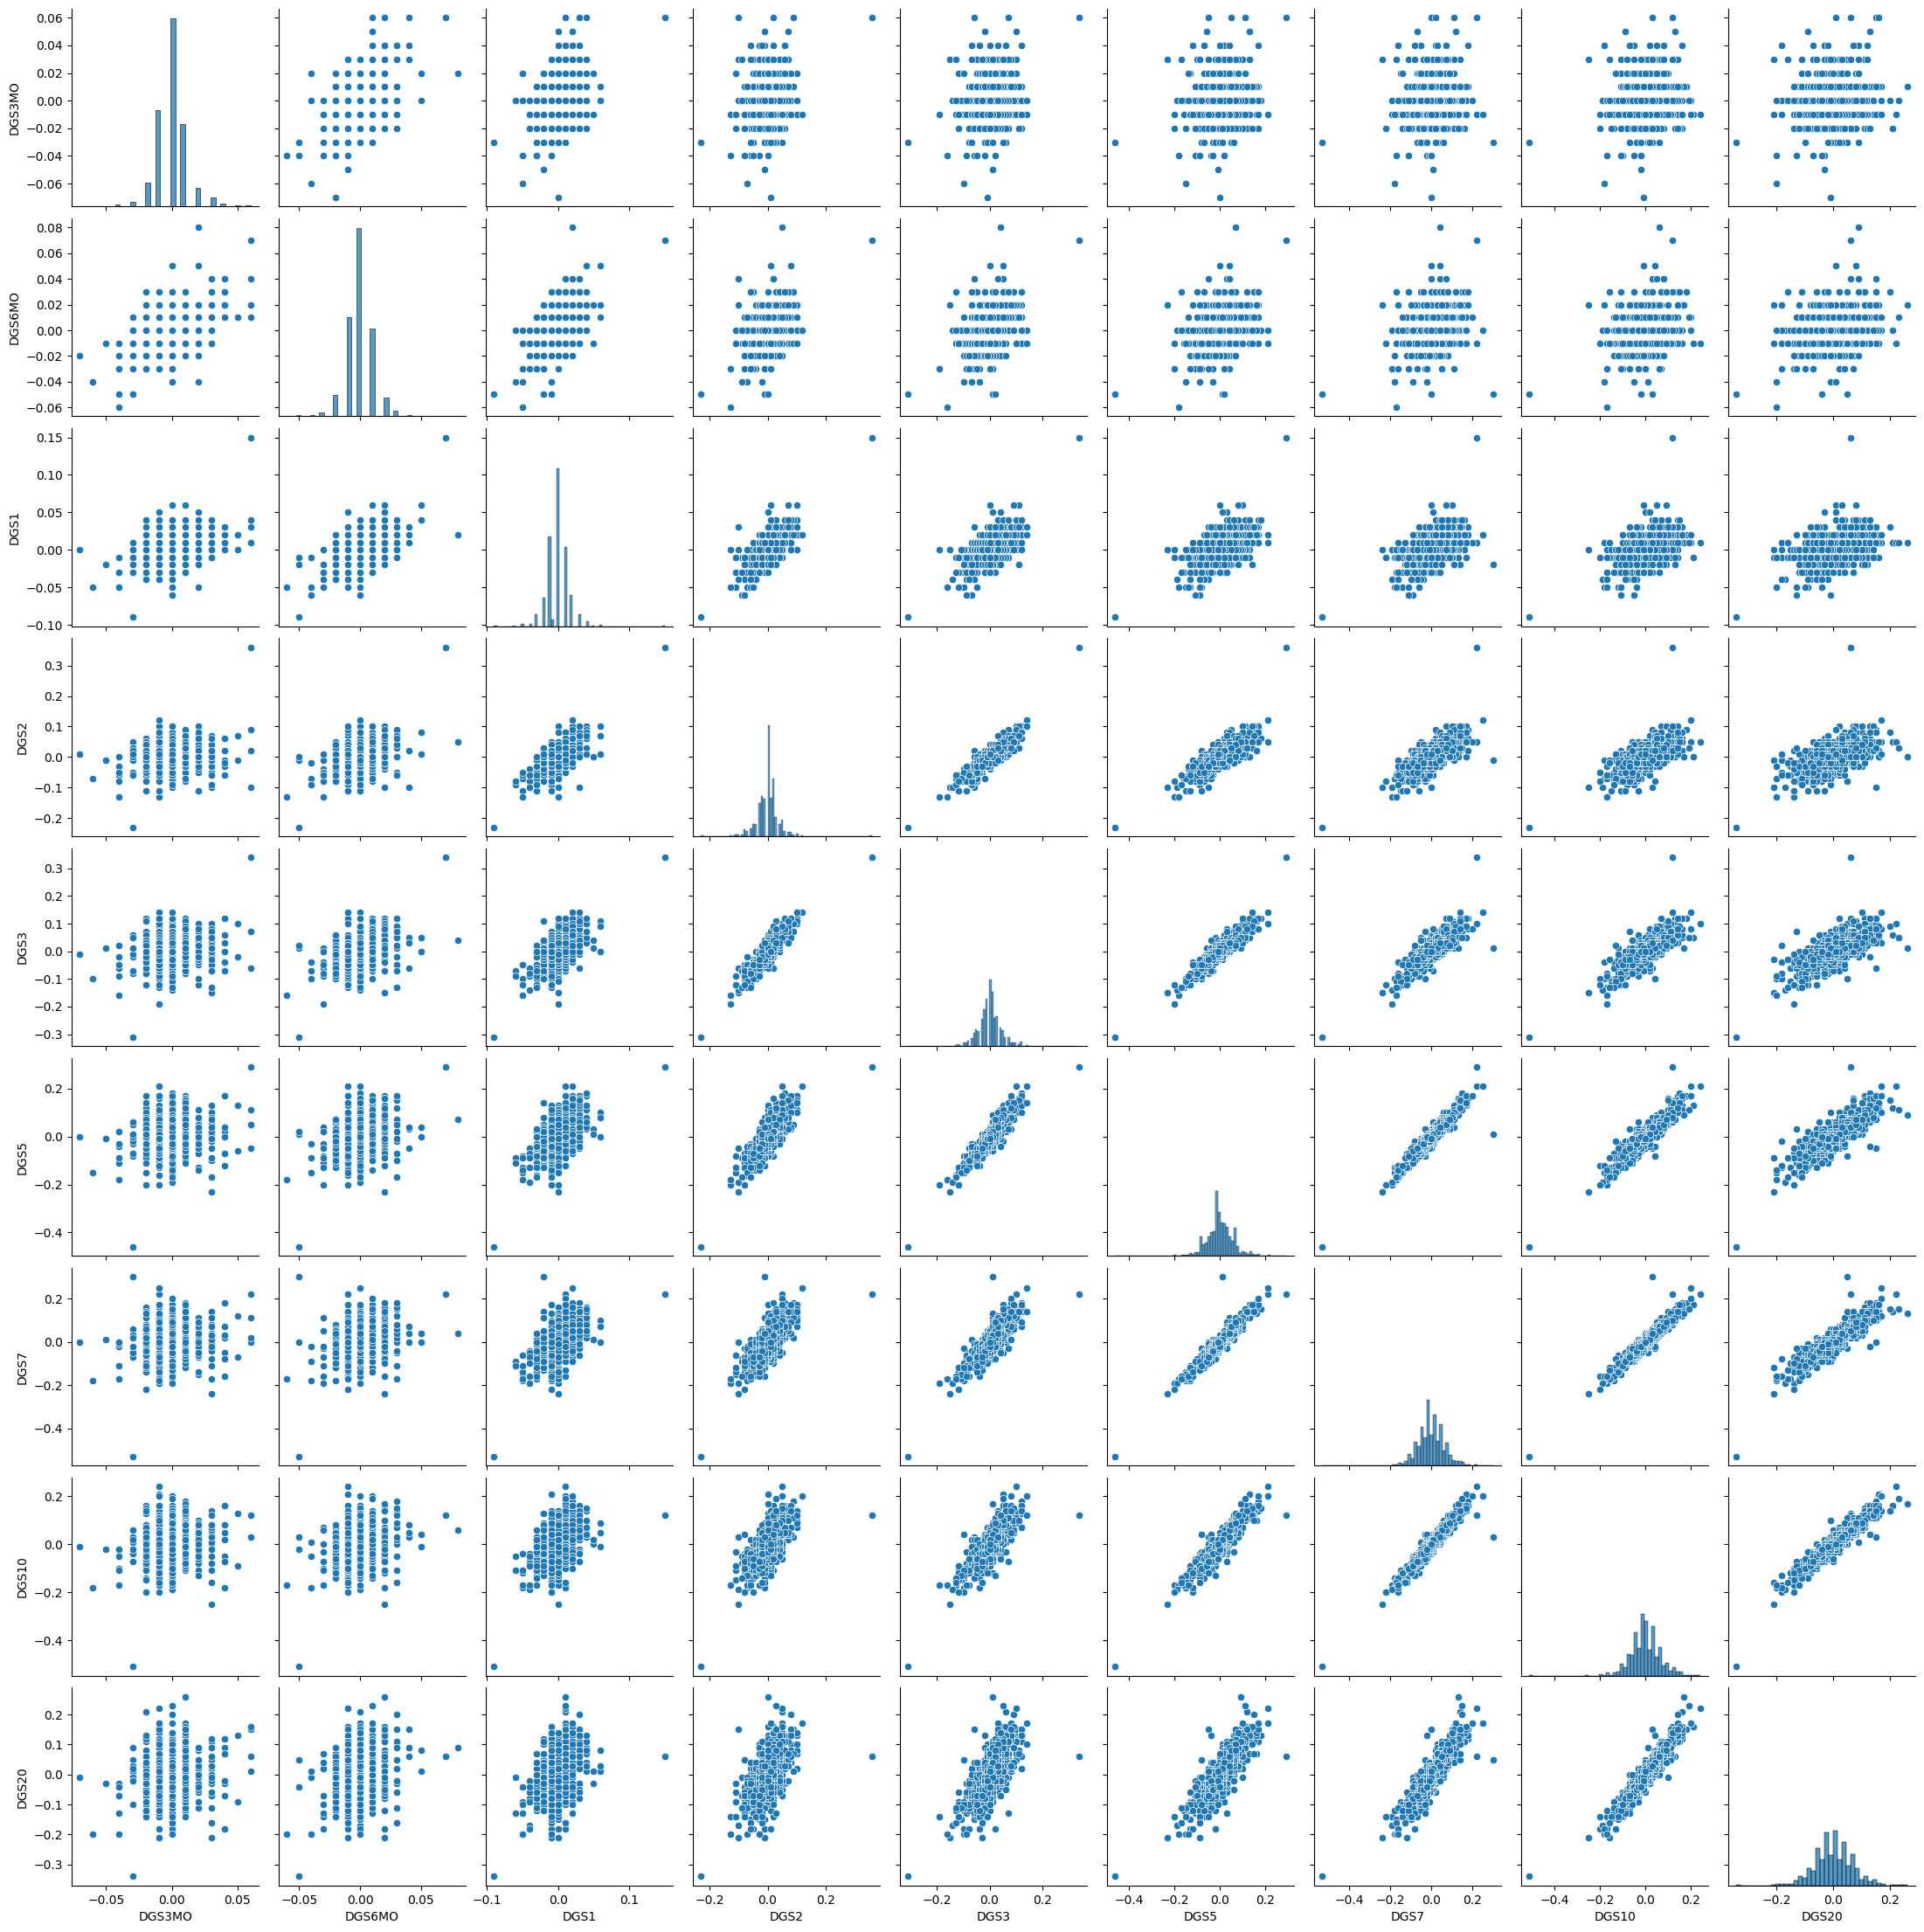

In [46]:
sns.pairplot(yield_changes2)

### PRINCIPAL COMPONENT ANALYSIS (PCA)

In [47]:
correlation_matrix2 = yield_changes2.corr()

pca2 = PCA(random_state=42)

pca.fit(correlation_matrix2)

explained_variance2 = pca.explained_variance_

explained_variance_ratio2 = pca.explained_variance_ratio_

components2 = pca.components_

cumulative_explained_ratio2 = np.cumsum(explained_variance_ratio)

print(f'Eigen Values :\n {explained_variance2}')
print('-'*70)
print(f'Eigen Vectors :\n {components2}')
print('-'*70)
print(f'Cumulative Explained Ratio :\n {cumulative_explained_ratio2}')
print('-'*70)
print(f'Explained Variance Ratio:\n' + ', '.join(f"{x:.10f}" for x in explained_variance_ratio2))

Eigen Values :
 [6.39769678e-01 7.97237040e-02 2.91354907e-02 1.32661158e-02
 2.05485023e-03 3.22687101e-04 1.00943756e-04 4.47989972e-05
 4.08195042e-34]
----------------------------------------------------------------------
Eigen Vectors :
 [[ 0.34508543  0.21294185 -0.01729497 -0.26277555 -0.33727072 -0.39316893
  -0.41624624 -0.41181578 -0.39374508]
 [-0.21647796  0.29862375  0.64254007  0.46333064  0.27244925  0.05403576
  -0.10234874 -0.21406619 -0.32090508]
 [-0.46045273  0.79943137 -0.16114815 -0.23023136 -0.14751048 -0.02667721
   0.04547805  0.1034949   0.18619105]
 [-0.23695102 -0.26691314  0.6781096  -0.41350172 -0.36604712 -0.16289716
  -0.00724788  0.11011876  0.26285098]
 [-0.47083077 -0.25156867 -0.25341288  0.51046199 -0.26268369 -0.38889468
  -0.32256198 -0.13570842  0.21803041]
 [-0.10840293 -0.06381012 -0.02208091 -0.35134025  0.71479325 -0.15149462
  -0.44866455 -0.17811405  0.30552419]
 [-0.37950119 -0.19242013 -0.12630876 -0.22989482  0.16681567 -0.29522307
   0.

- The first Principal Component Variable Explains 83.69% of the total Variability
- The second principal component variable explains 10.42% of the total variability
- The first three principal component variables explain 97.92% of the total variability

Text(0, 0.5, 'Variances')

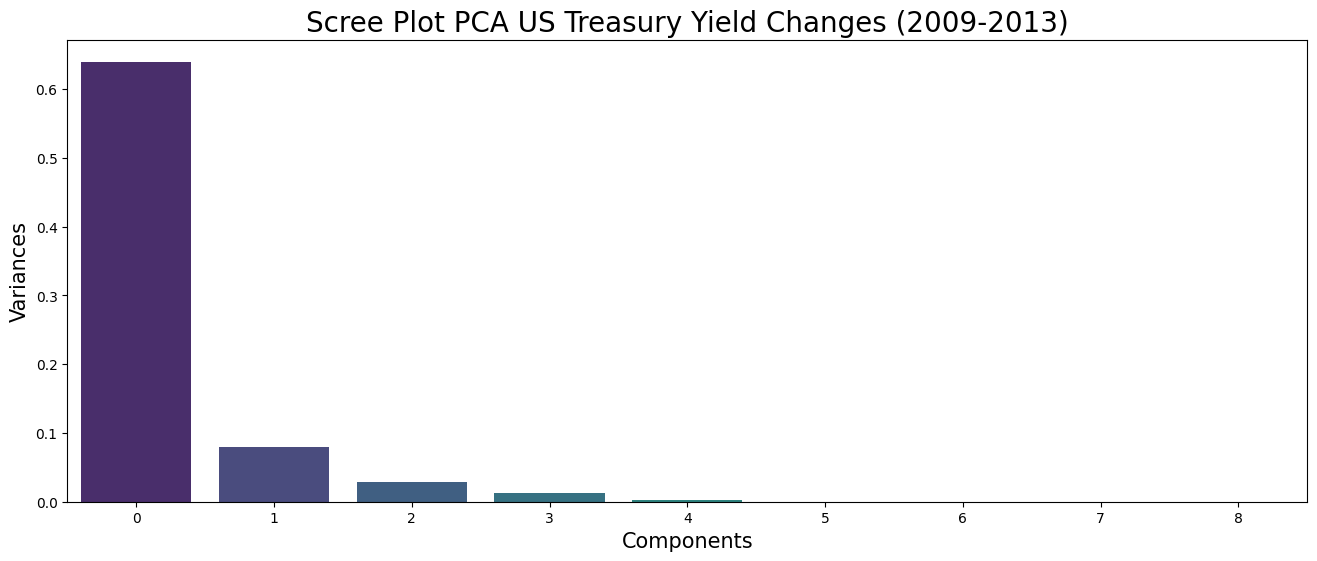

In [50]:
sns.barplot(explained_variance2,palette='viridis')
plt.title('Scree Plot PCA US Treasury Yield Changes (2009-2013)',size=20)
plt.xlabel('Components',size=15)
plt.ylabel('Variances',size=15)

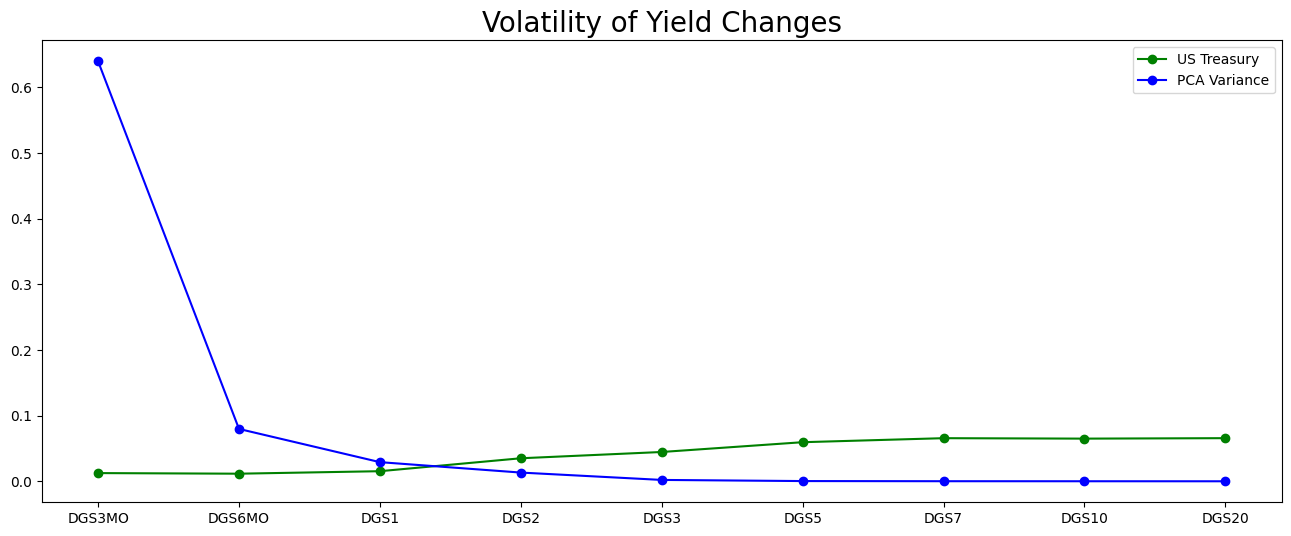

In [55]:
plt.plot(daily_volatility2,color='green',marker='o',label='US Treasury')
plt.plot(explained_variance2,color='blue',marker='o',label='PCA Variance')
plt.title('Volatility of Yield Changes',size=20)
plt.legend()

In [56]:
eigen_vectors2 = pd.DataFrame(components2,index=tenors,columns=[f'Comp. {i}'for i in range(1,10)])

eigen_vectors2

Comp. 1   Comp. 2   Comp. 3   Comp. 4   Comp. 5   Comp. 6   Comp. 7  \
DGS3MO  0.345085  0.212942 -0.017295 -0.262776 -0.337271 -0.393169 -0.416246   
DGS6MO -0.216478  0.298624  0.642540  0.463331  0.272449  0.054036 -0.102349   
DGS1   -0.460453  0.799431 -0.161148 -0.230231 -0.147510 -0.026677  0.045478   
DGS2   -0.236951 -0.266913  0.678110 -0.413502 -0.366047 -0.162897 -0.007248   
DGS3   -0.470831 -0.251569 -0.253413  0.510462 -0.262684 -0.388895 -0.322562   
DGS5   -0.108403 -0.063810 -0.022081 -0.351340  0.714793 -0.151495 -0.448665   
DGS7   -0.379501 -0.192420 -0.126309 -0.229895  0.166816 -0.295223  0.599095   
DGS10   0.045120  0.036709  0.021795  0.038777  0.210245 -0.603857  0.010390   
DGS20  -0.431742 -0.222295 -0.141093 -0.232200 -0.065633  0.435041 -0.387007   

         Comp. 8   Comp. 9  
DGS3MO -0.411816 -0.393745  
DGS6MO -0.214066 -0.320905  
DGS1    0.103495  0.186191  
DGS2    0.110119  0.262851  
DGS3   -0.135708  0.218030  
DGS5   -0.178114  0.305524  
DGS7   -0.401441 -0.339256  
DGS10   0.706417 -0.294377  
DGS20   0.226770 -0.543684

Text(0.5, 1.0, 'US Treasury Yield Changes: PCA (Loadings: PC1)')

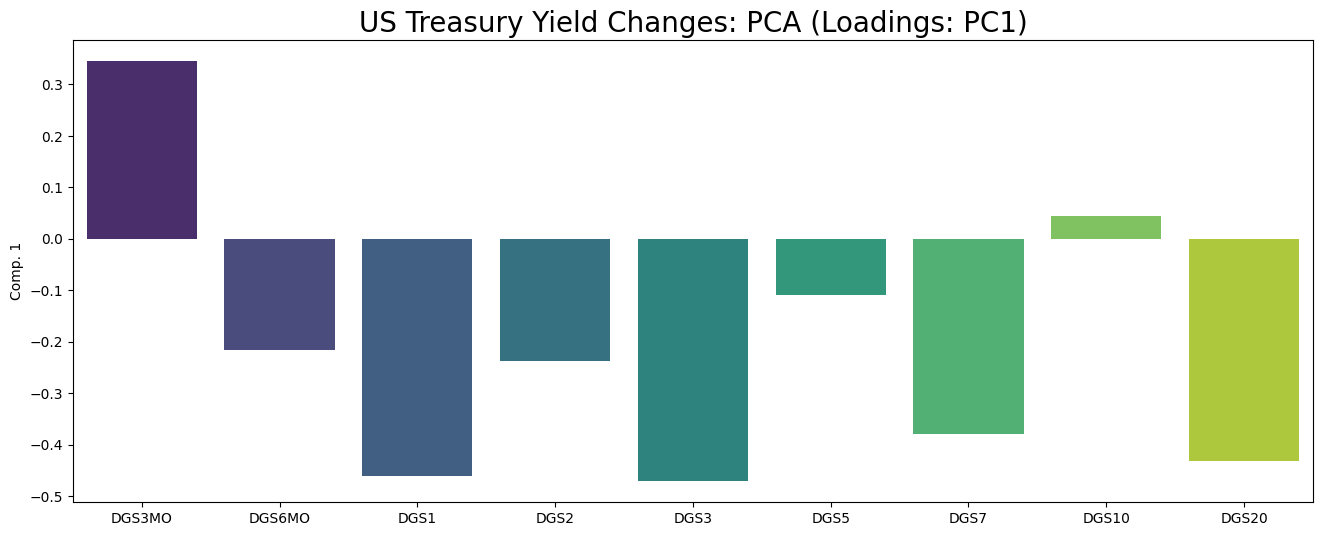

In [64]:
sns.barplot(eigen_vectors2['Comp. 1'],palette='viridis')
plt.title('US Treasury Yield Changes: PCA (Loadings: PC1)',size=20)

Text(0.5, 1.0, 'Loadings: PC2')

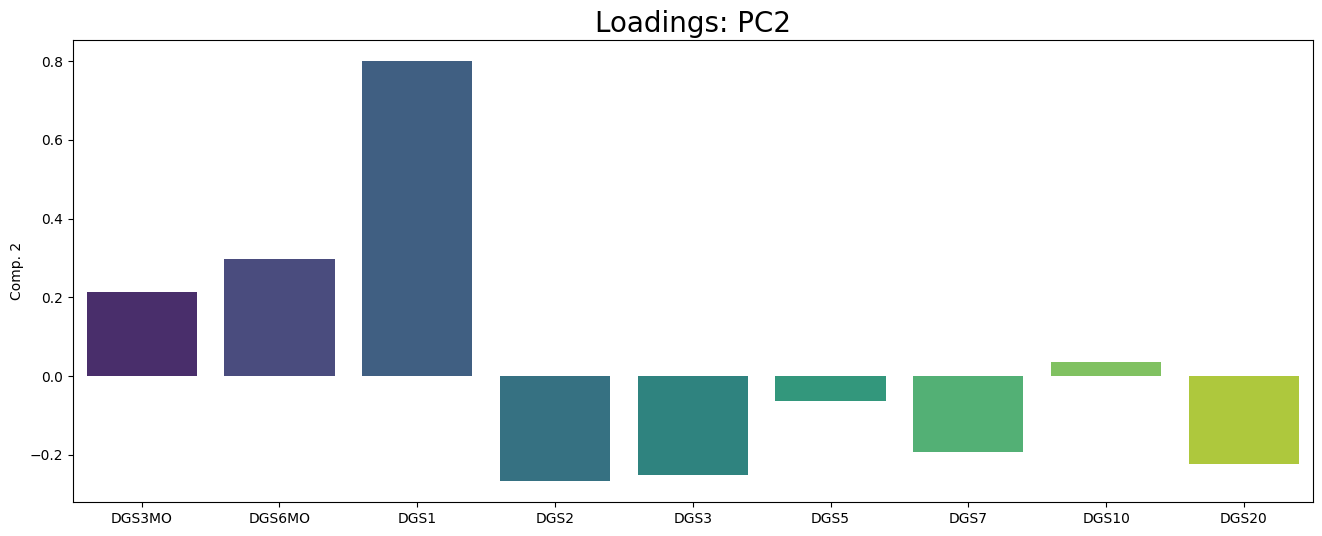

In [65]:
sns.barplot(eigen_vectors2['Comp. 2'],palette='viridis')
plt.title('Loadings: PC2',size=20)

Text(0.5, 1.0, 'Loadings: PC2')

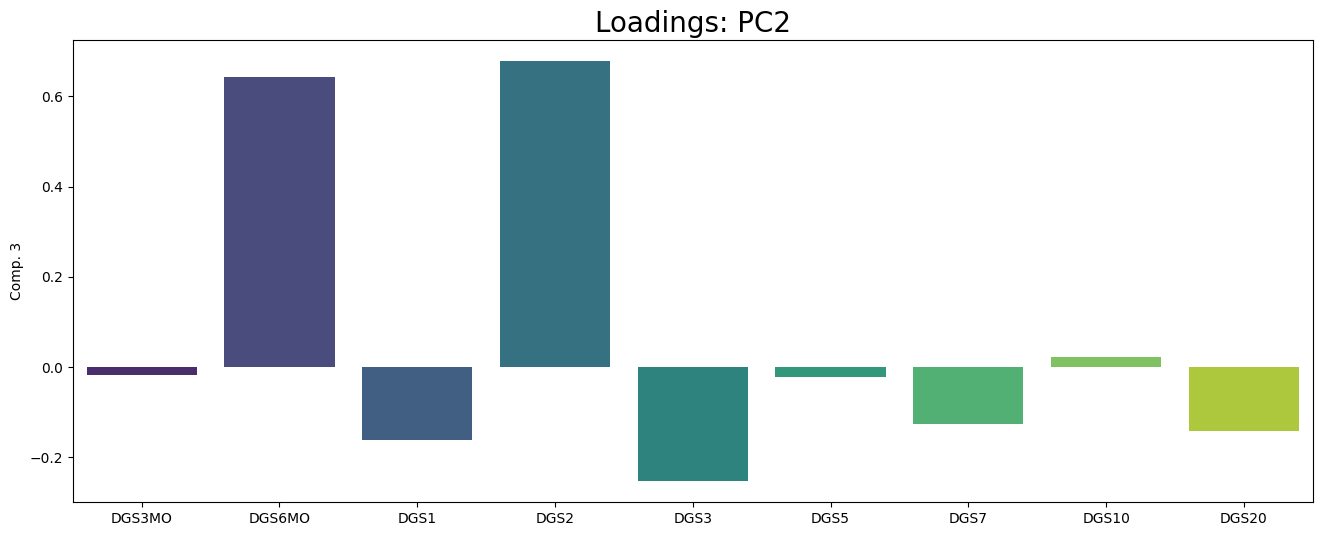

In [67]:
sns.barplot(eigen_vectors2['Comp. 3'],palette='viridis')
plt.title('Loadings: PC2',size=20)

Let's analyze each component:

1. Comp. 1 (Level):
   - Shows mixed signs across maturities, which is unusual for a level component.
   - Largest magnitudes are on DGS1, DGS3, and DGS20, suggesting it might capture some complex shift in the yield curve.
   - This component might represent a non-parallel shift in the overall yield curve level.

2. Comp. 2 (Slope):
   - Clear contrast between short-term (positive) and long-term (negative) rates.
   - Strongly positive for DGS1, indicating it captures changes in the yield curve steepness.
   - Useful for modeling and trading on changes in the yield curve slope.

3. Comp. 3 (Curvature):
   - Prominent positive values for DGS6MO and DGS2, with negative values elsewhere.
   - Likely represents changes in the curvature or "belly" of the yield curve.
   - Important for butterfly trades and modeling complex yield curve shapes.

The principal component variables are uncorrelated. This is evident from the correlation matrix of the variables and the pairs plot:

In [74]:
scores2 = pd.DataFrame(pca.fit_transform(yield_changes2),index=yield_changes2.index,
                      columns=[f'Comp. {i}'for i in range(1,10)])

scores2.head()

Comp. 1   Comp. 2   Comp. 3   Comp. 4   Comp. 5   Comp. 6  \
DATE                                                                     
2009-01-05 -0.027844 -0.173895 -0.083459 -0.068279 -0.028693  0.027955   
2009-01-06 -0.044371 -0.001210 -0.029458  0.016362 -0.001923  0.009715   
2009-01-07  0.009537  0.022873 -0.019480  0.060723 -0.028848  0.002269   
2009-01-08  0.082916  0.011434 -0.041171  0.048339 -0.011078  0.009277   
2009-01-09  0.127895 -0.076024 -0.008085  0.006433 -0.016188  0.024268   

             Comp. 7   Comp. 8   Comp. 9  
DATE                                      
2009-01-05  0.033356  0.008077 -0.008165  
2009-01-06 -0.006099  0.011926 -0.010479  
2009-01-07 -0.024831  0.026859  0.021021  
2009-01-08  0.006188  0.016102  0.010159  
2009-01-09  0.002502  0.014936  0.020723

In [75]:
scores2.corr().round()

Comp. 1  Comp. 2  Comp. 3  Comp. 4  Comp. 5  Comp. 6  Comp. 7  \
Comp. 1      1.0      0.0     -0.0      0.0      0.0      0.0      0.0   
Comp. 2      0.0      1.0      0.0     -0.0      0.0      0.0      0.0   
Comp. 3     -0.0      0.0      1.0     -0.0     -0.0      0.0      0.0   
Comp. 4      0.0     -0.0     -0.0      1.0     -0.0      0.0      0.0   
Comp. 5      0.0      0.0     -0.0     -0.0      1.0      0.0     -0.0   
Comp. 6      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
Comp. 7      0.0      0.0      0.0      0.0     -0.0      0.0      1.0   
Comp. 8      0.0     -0.0      0.0      0.0     -0.0     -0.0     -0.0   
Comp. 9      0.0     -0.0     -0.0     -0.0     -0.0     -0.0     -0.0   

         Comp. 8  Comp. 9  
Comp. 1      0.0      0.0  
Comp. 2     -0.0     -0.0  
Comp. 3      0.0     -0.0  
Comp. 4      0.0     -0.0  
Comp. 5     -0.0     -0.0  
Comp. 6     -0.0     -0.0  
Comp. 7     -0.0     -0.0  
Comp. 8      1.0      0.0  
Comp. 9      0.0      1.0

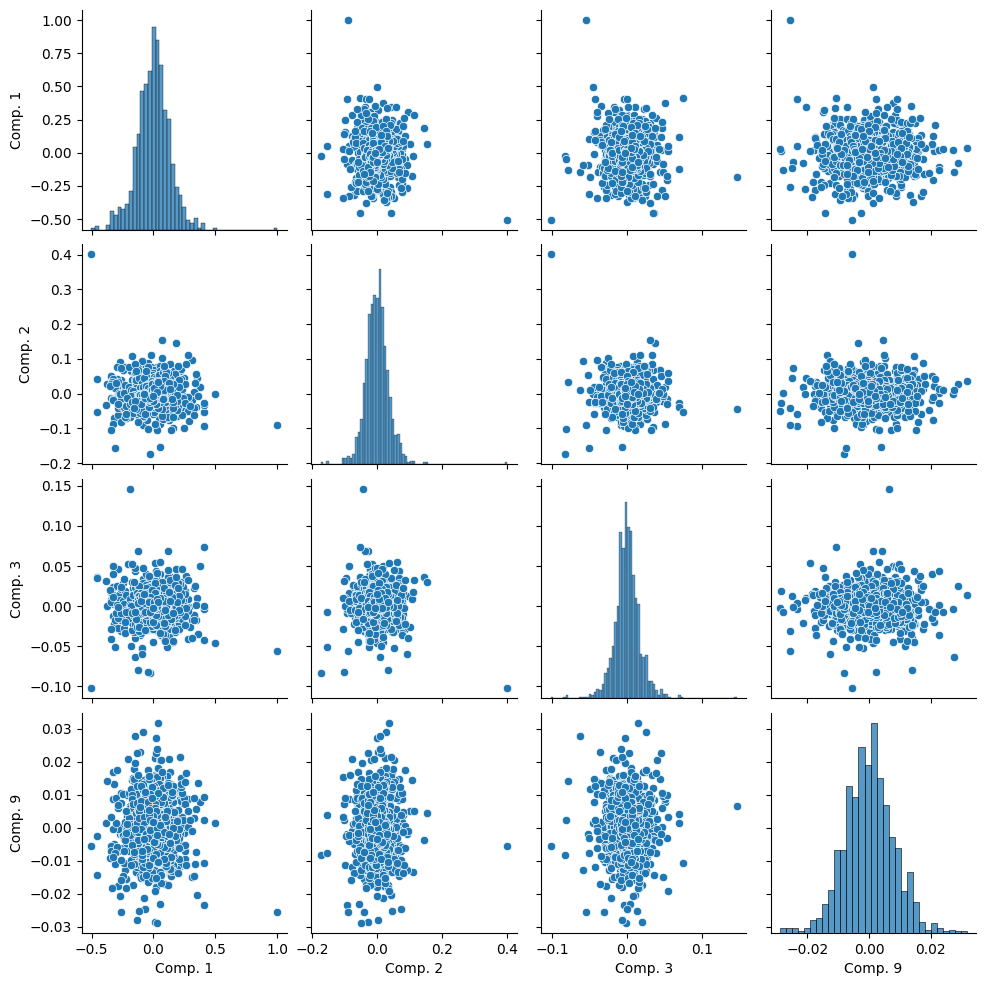

In [76]:
sns.pairplot(scores2.iloc[:,[0,1,2,8]])

Plotting the cumulative scores of the principal components variables displays the evolution of these factors characterizing the variability in the treasury yield data.

Text(0, 0.5, 'Cumulative PC1')

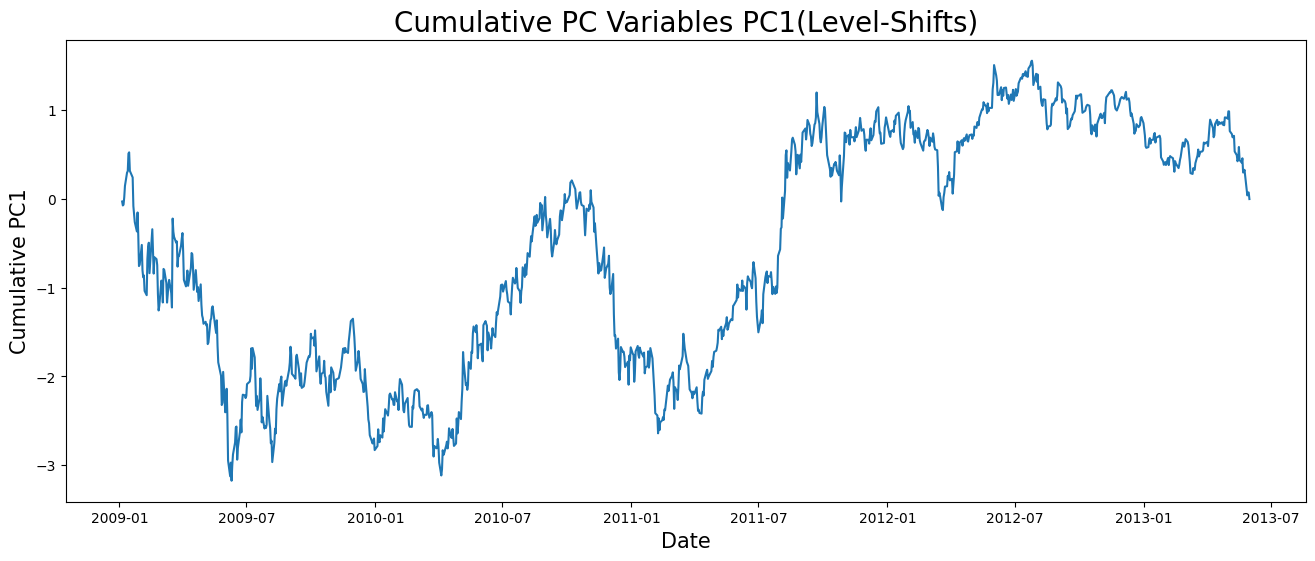

In [77]:
plt.plot(scores2['Comp. 1'].cumsum())

plt.title('Cumulative PC Variables PC1(Level-Shifts)',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Cumulative PC1',size=15)

Text(0, 0.5, 'Cumulative PC2')

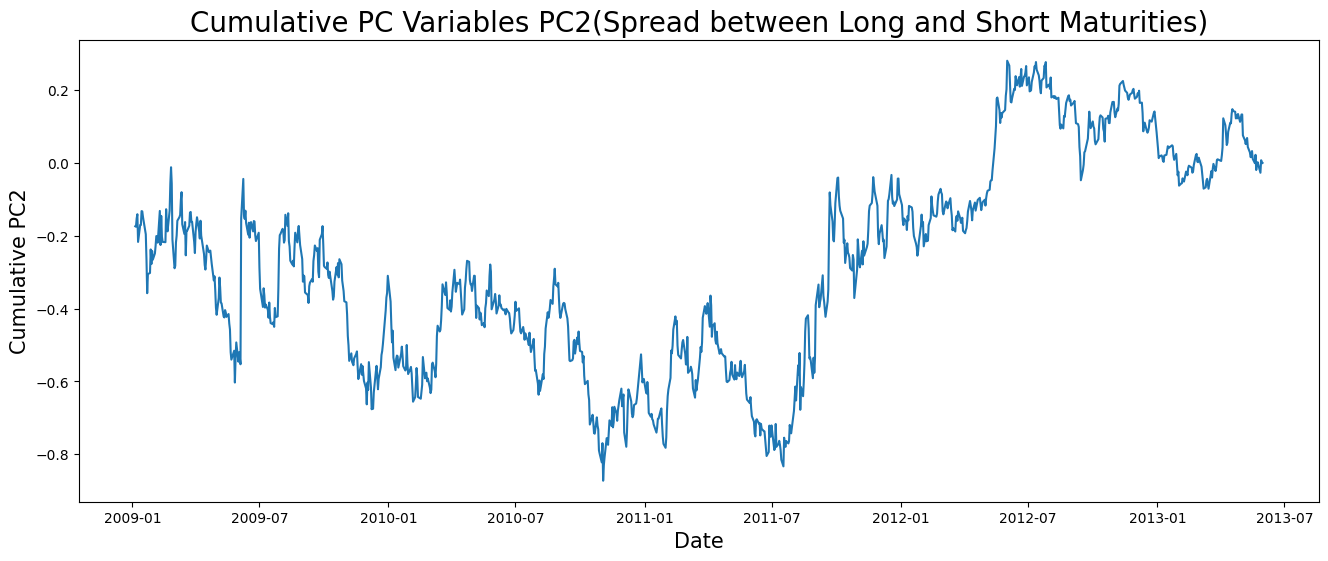

In [78]:
plt.plot(scores2['Comp. 2'].cumsum())

plt.title('Cumulative PC Variables PC2(Spread between Long and Short Maturities)',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Cumulative PC2',size=15)

Text(0, 0.5, 'Cumulative PC3')

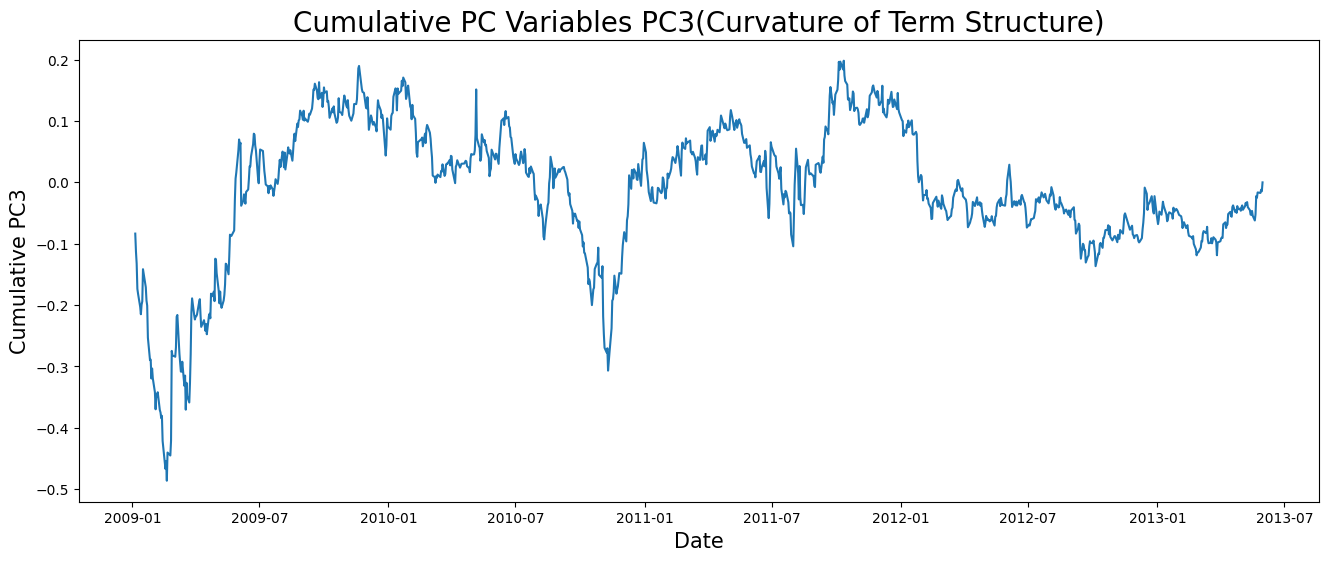

In [79]:
plt.plot(scores2['Comp. 3'].cumsum())

plt.title('Cumulative PC Variables PC3(Curvature of Term Structure)',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Cumulative PC3',size=15)

### Factor Analysis

In [83]:
fa2 = FactorAnalyzer(n_factors=4,rotation=None)

fa2.fit(yield_changes2)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

In [84]:
uniquenesses2 = fa2.get_uniquenesses()

print(f'Uniquenesses for Maturities: \n{tenors} \n{uniquenesses2}')

Uniquenesses for Maturities: 
['DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20'] 
[0.65154524 0.35880554 0.41509244 0.01229168 0.06315576 0.00455198
 0.0341254  0.00456979 0.06299099]


In [85]:
loadings2 = fa2.loadings_

print(f'Loadings (Factors vs Maturities) :\n{loadings2}')

Loadings (Factors vs Maturities) :
[[ 0.20336075  0.49437809  0.25022702 -0.00871267]
 [ 0.41039471  0.63769414  0.25592479 -0.02488622]
 [ 0.62074484  0.43639475 -0.09077298  0.03005474]
 [ 0.87280483  0.2056195  -0.40279377  0.14628002]
 [ 0.935523    0.04103005 -0.22751244 -0.09052944]
 [ 0.97711399 -0.12053953 -0.0542576  -0.15238967]
 [ 0.95143713 -0.22737856  0.07768649 -0.05390529]
 [ 0.93566992 -0.27497817  0.2050712   0.04779964]
 [ 0.8641123  -0.30039772  0.29169458  0.12245169]]


In [86]:
ss_loadings2 = fa2.get_factor_variance()[0]

print(f'SS Loadings :\n{ss_loadings2}')

SS Loadings :
[5.71424778 1.11754931 0.48647453 0.07459956]


In [87]:
prop_var2 = fa2.get_factor_variance()[1]

print(f'Proportional Variance :\n{prop_var2}')

Proportional Variance :
[0.63491642 0.12417215 0.05405273 0.00828884]


In [88]:
cumulative_var2 = fa2.get_factor_variance()[2]

print(f'Cumulative Variance :\n{cumulative_var2}')

Cumulative Variance :
[0.63491642 0.75908857 0.81314129 0.82143013]


In [89]:
fa2.sufficiency(yield_changes2.shape[1])

(0.007801335769154425, 6, 0.9999999901373126)

- For the period since 2009, the yield changes can be described by a 4-factor model.
- The uniquenesses are the speci c variances of the component yield changes; note the high the value for the 3-month yield changes (DGS3MO) as compared with the other tenors.